In [107]:
# Data mining and machine learning of video games rating
# Authur: Haoran Hong
import sys
assert sys.version_info >= (3, 5)

In [108]:
import sklearn
assert sklearn.__version__ >= "0.20"


In [109]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [110]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [111]:
#reading data
data_train = pd.read_csv("ESRB.csv")
data_test = pd.read_csv("ESRB_test.csv")

data_sorted = pd.read_csv("ESRB_sorted.csv")

In [112]:
data_train.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [113]:
data_test.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET


In [114]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [115]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     500 non-null    object
 1   console                   500 non-null    int64 
 2   alcohol_reference         500 non-null    int64 
 3   animated_blood            500 non-null    int64 
 4   blood                     500 non-null    int64 
 5   blood_and_gore            500 non-null    int64 
 6   cartoon_violence          500 non-null    int64 
 7   crude_humor               500 non-null    int64 
 8   drug_reference            500 non-null    int64 
 9   fantasy_violence          500 non-null    int64 
 10  intense_violence          500 non-null    int64 
 11  language                  500 non-null    int64 
 12  lyrics                    500 non-null    int64 
 13  mature_humor              500 non-null    int64 
 14  mild_blood                

In [116]:
data_train["esrb_rating"].value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

In [117]:
data_test["esrb_rating"].value_counts()

T     184
ET    126
E     100
M      90
Name: esrb_rating, dtype: int64

In [118]:
data_train.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,...,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,0.475462,0.050132,0.010026,0.227968,0.126121,0.019525,0.054354,0.034828,0.220580,0.118206,...,0.013193,0.034301,0.057520,0.067018,0.118206,0.035884,0.117678,0.015831,0.015831,0.063852
std,0.499529,0.218275,0.099655,0.419633,0.332074,0.138398,0.226774,0.183394,0.414748,0.322937,...,0.114129,0.182049,0.232895,0.250120,0.322937,0.186050,0.322312,0.124855,0.124855,0.244554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
data_test.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.00000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.494000,0.052000,0.002000,0.244000,0.13200,0.02200,0.040000,0.032000,0.266000,0.076000,...,0.058000,0.02000,0.010000,0.02200,0.052000,0.050000,0.076000,0.086000,0.050000,0.308000
std,0.500465,0.222249,0.044721,0.429923,0.33883,0.14683,0.196155,0.176176,0.442307,0.265264,...,0.233978,0.14014,0.099598,0.14683,0.222249,0.218163,0.265264,0.280645,0.218163,0.462129
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


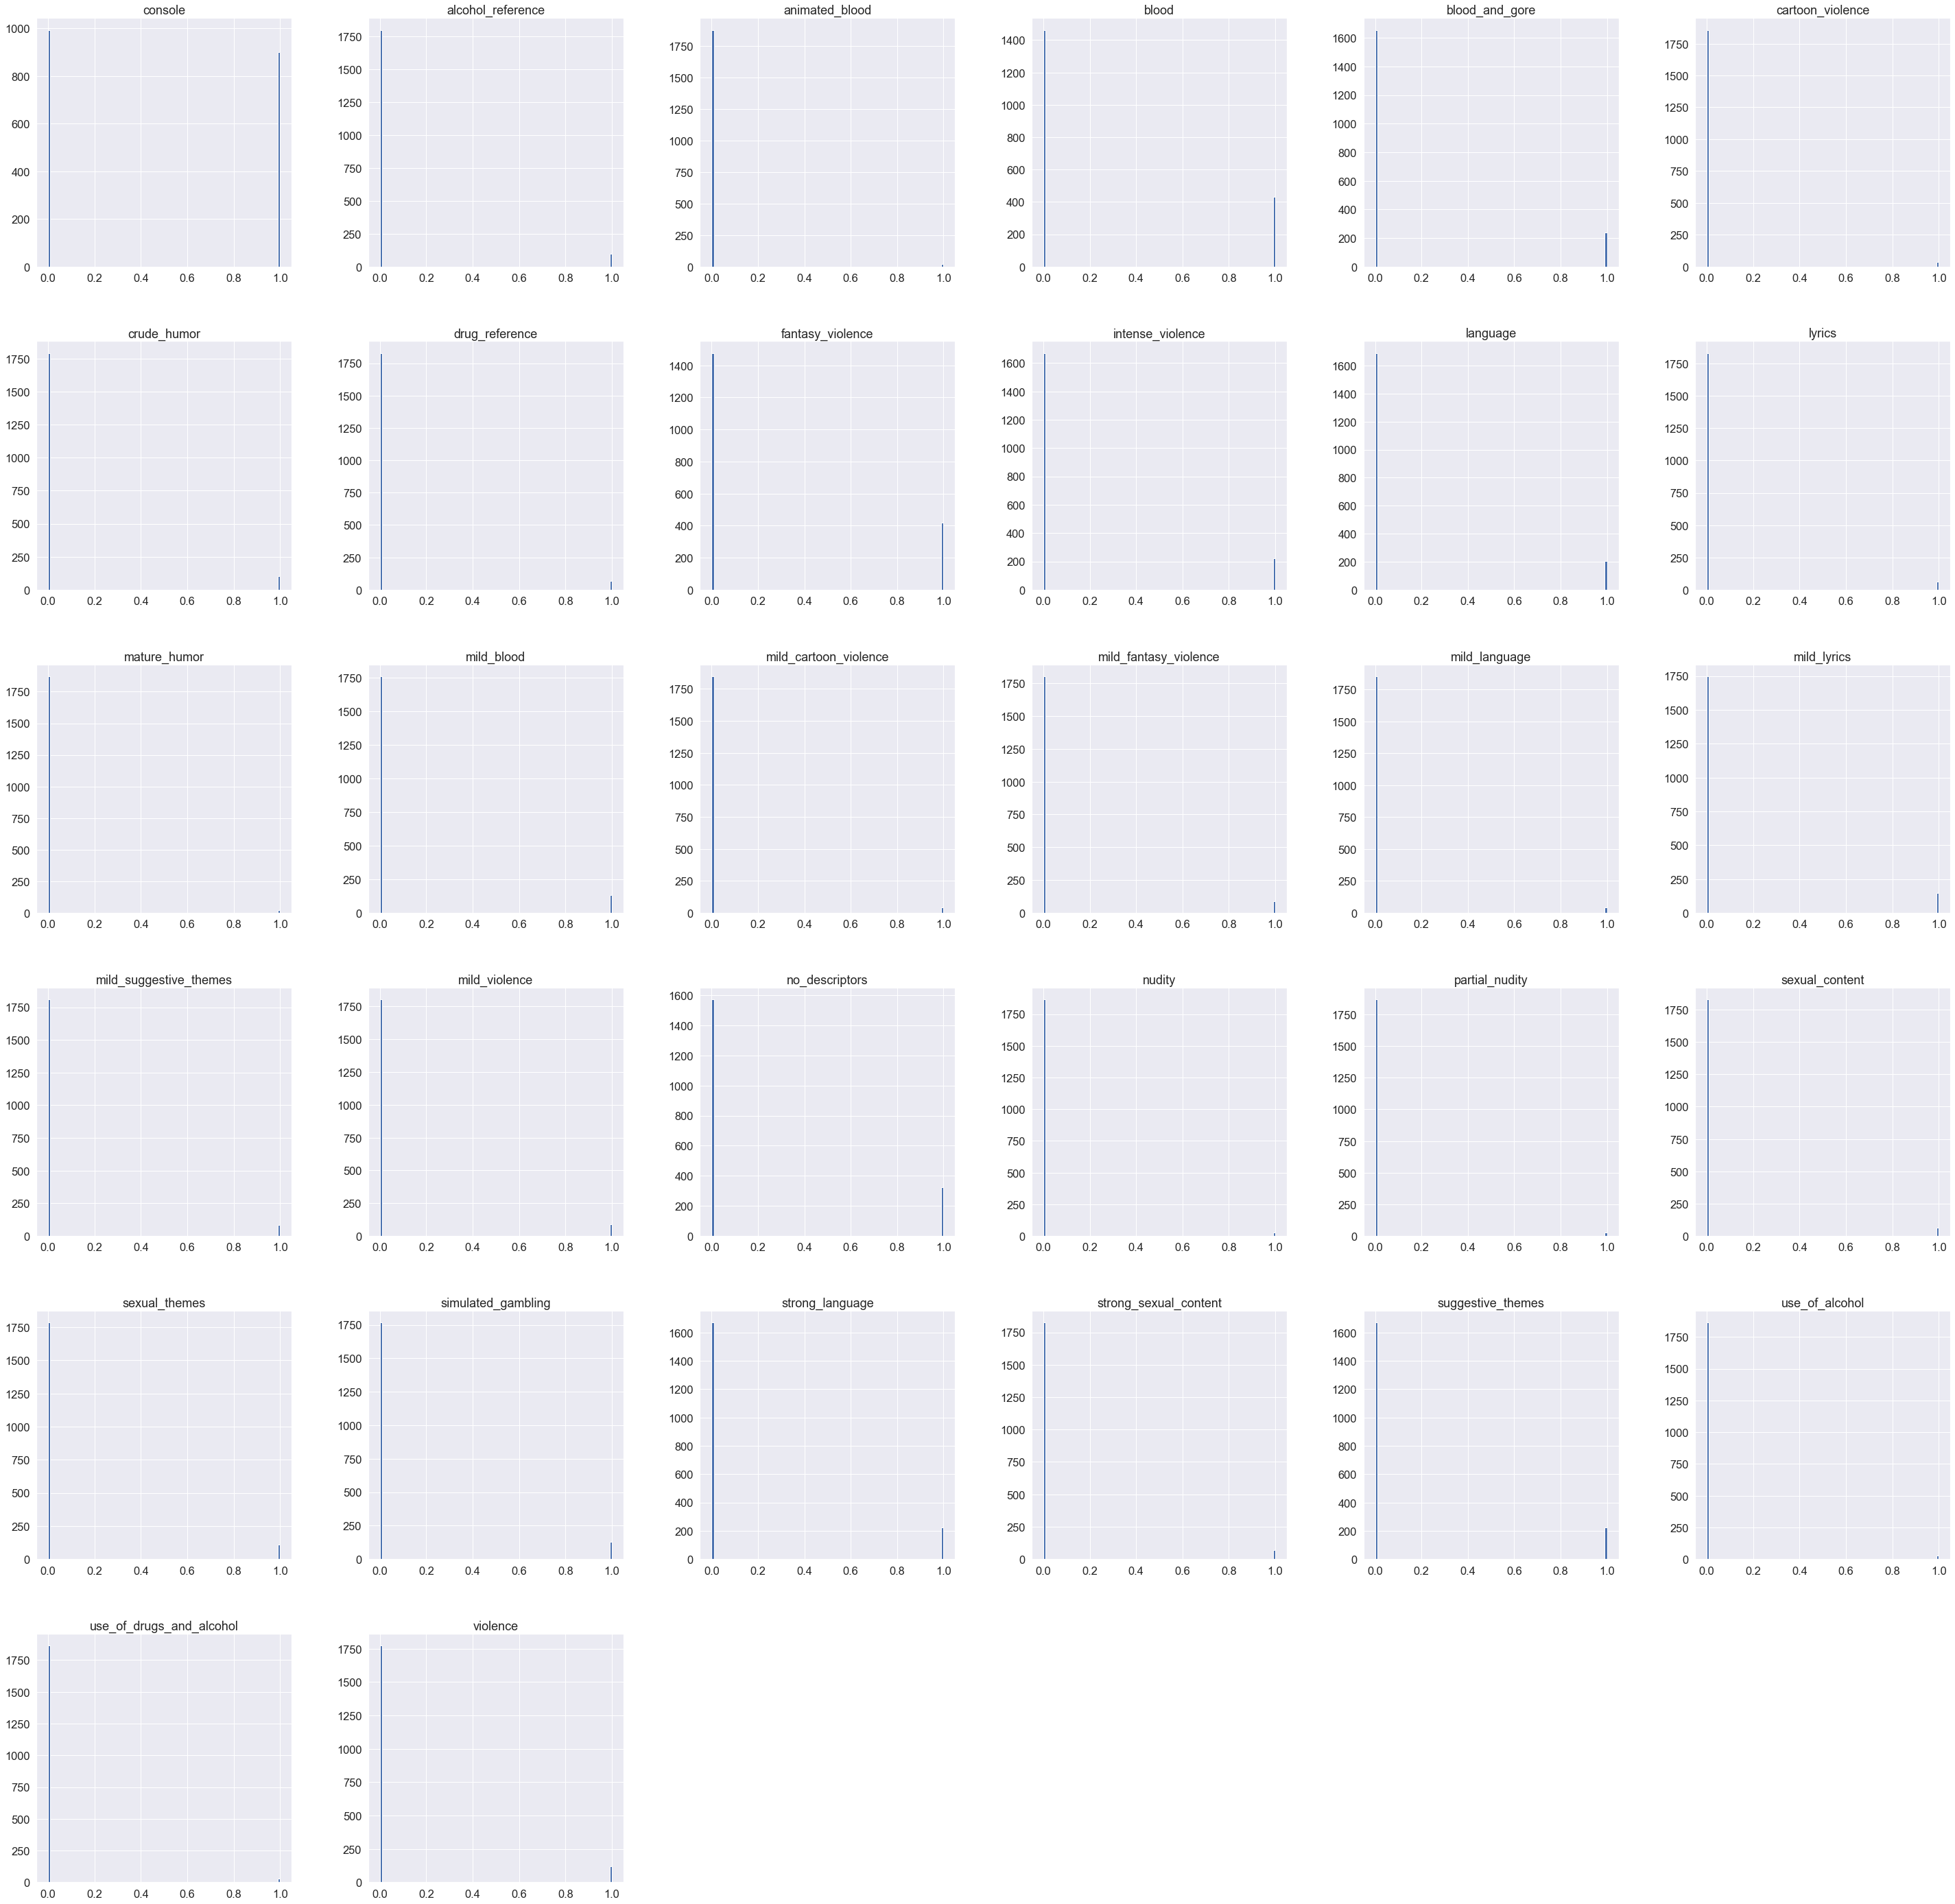

In [120]:
data_train.hist(bins=100, figsize=(50,50))
#save_fig("attribute_histogram_plots")
plt.show()

In [121]:
#data_train.plot(kind="scatter", x="strong_sexual_content", y="esrb_rating")

<AxesSubplot:>

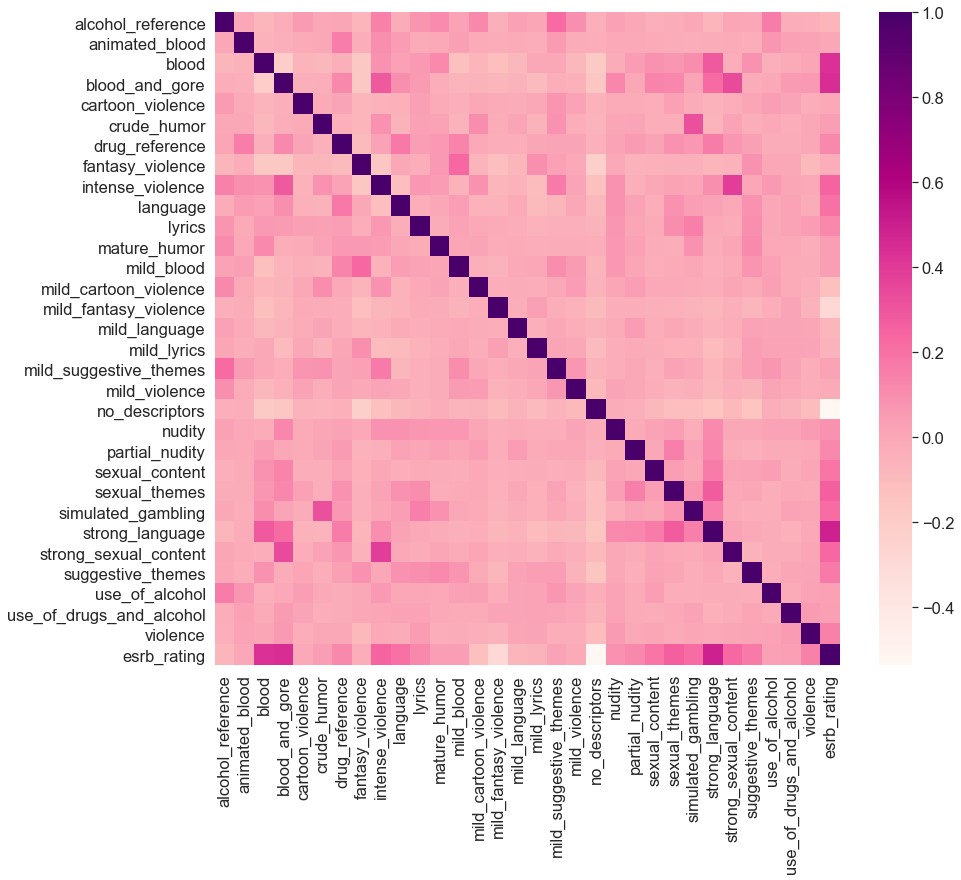

In [122]:
#cleaning data, seperating class output for confusion matrix
data_train_clean = data_train.drop(columns = ["title", "console"])
data_train_clean_E = data_train.drop(columns = ["title", "console"])
data_train_clean_ET = data_train.drop(columns = ["title", "console"])
data_train_clean_T = data_train.drop(columns = ["title", "console"])
data_train_clean_M = data_train.drop(columns = ["title", "console"])

trans_all = {'E' : 1, 'ET': 2,'T' : 3,'M' : 4}
trans_E = {'E' : 1, 'ET': 0,'T' : 0,'M' : 0}
trans_ET = {'E' : 0, 'ET': 1,'T' : 0,'M' : 0}
trans_T = {'E' : 0, 'ET': 0,'T' : 1,'M' : 0}
trans_M = {'E' : 0, 'ET': 0,'T' : 0,'M' : 1}

data_train_clean["esrb_rating"] = data_train_clean["esrb_rating"].map(trans_all)
data_train_clean_E["esrb_rating"] = data_train_clean_E["esrb_rating"].map(trans_E)
data_train_clean_ET["esrb_rating"] = data_train_clean_ET["esrb_rating"].map(trans_ET)
data_train_clean_T["esrb_rating"] = data_train_clean_T["esrb_rating"].map(trans_T)
data_train_clean_M["esrb_rating"] = data_train_clean_M["esrb_rating"].map(trans_M)

#ploting the overall correlation confusion matrix
plt.figure(figsize=(14, 12))
data_train_columns = list(data_train_clean.columns)
correlation = data_train_clean[data_train_columns].corr()
sn.heatmap(correlation, cmap = 'RdPu')




<AxesSubplot:title={'center':'Correlation for All ESBR ratings'}>

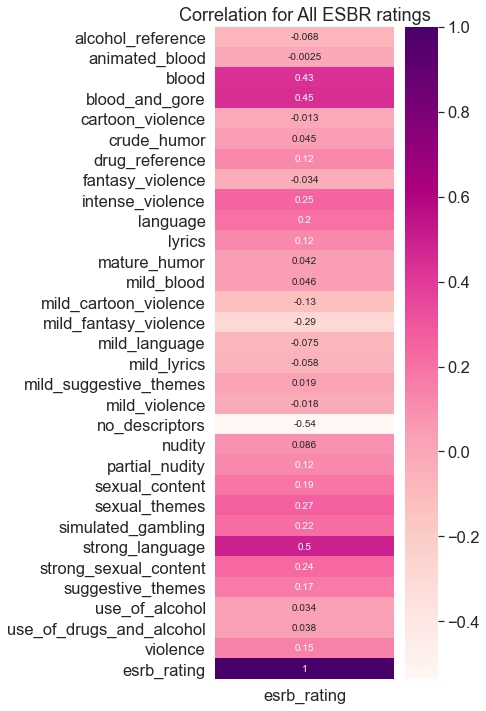

In [123]:
#ploting the correlation confusion matrix relative to all rating
plt.figure(figsize=(4, 12))
data_train_columns = list(data_train_clean.columns)
correlation = data_train_clean[data_train_columns].corr()
ax = plt.axes()
ax.set_title('Correlation for All ESBR ratings')
sn.heatmap(correlation.iloc[0:32,31:32], annot = True, cmap = 'RdPu', ax = ax)


<AxesSubplot:title={'center':'Correlation for E'}>

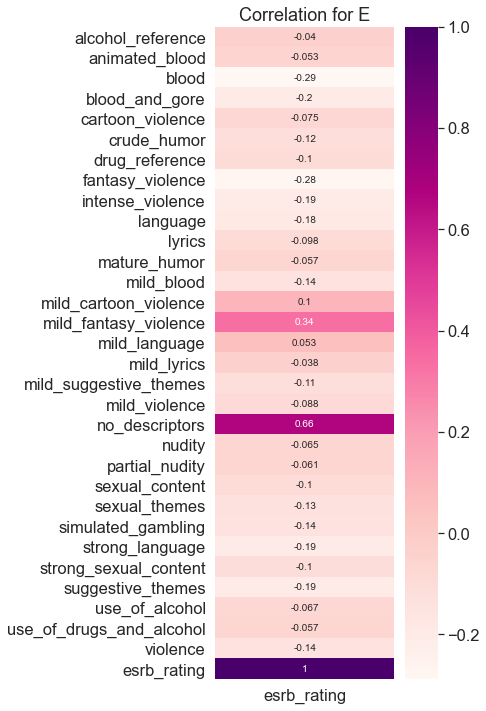

In [124]:
#ploting the correlation confusion matrix relative to E rating
plt.figure(figsize=(4, 12))
data_train_columns_E = list(data_train_clean_E.columns)
correlation = data_train_clean_E[data_train_columns_E].corr()
ax = plt.axes()
ax.set_title('Correlation for E')
sn.heatmap(correlation.iloc[0:32,31:32], annot = True, cmap = 'RdPu', ax = ax)

<AxesSubplot:title={'center':'Correlation for ET'}>

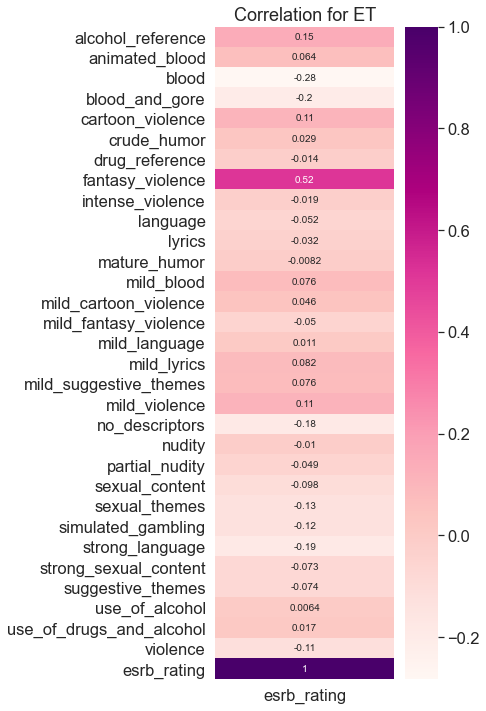

In [125]:
#ploting the correlation confusion matrix relative to ET rating
plt.figure(figsize=(4, 12))
data_train_columns_ET = list(data_train_clean_ET.columns)
correlation = data_train_clean_ET[data_train_columns_ET].corr()
ax = plt.axes()
ax.set_title('Correlation for ET')
sn.heatmap(correlation.iloc[0:32,31:32], annot = True, cmap = 'RdPu', ax = ax)

<AxesSubplot:title={'center':'Correlation for T'}>

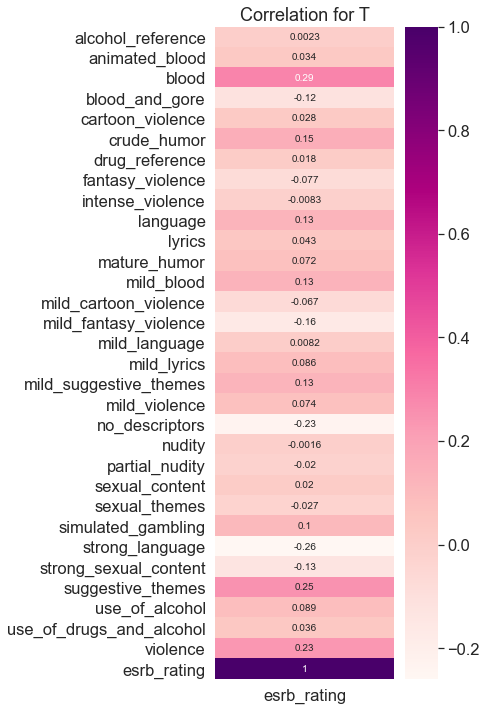

In [126]:
#ploting the correlation confusion matrix relative to T rating
plt.figure(figsize=(4, 12))
data_train_columns_T = list(data_train_clean_T.columns)
correlation = data_train_clean_T[data_train_columns_T].corr()
ax = plt.axes()
ax.set_title('Correlation for T')
sn.heatmap(correlation.iloc[0:32,31:32], annot = True, cmap = 'RdPu', ax = ax)


<AxesSubplot:title={'center':'Correlation for M'}>

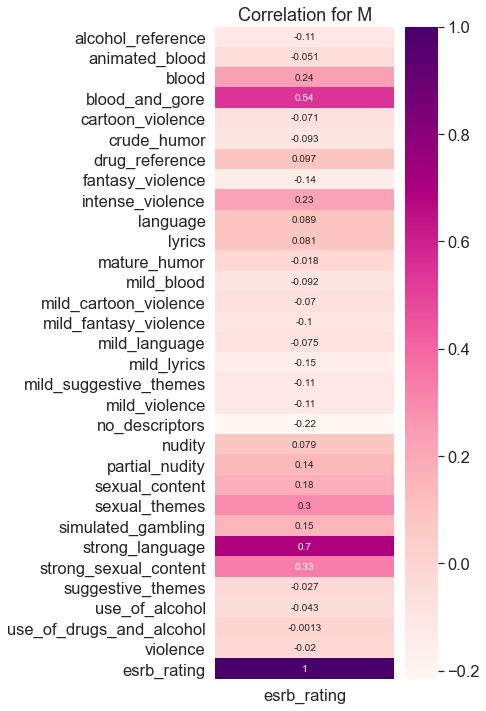

In [127]:
#ploting the correlation confusion matrix relative to M rating
plt.figure(figsize=(4, 12))
data_train_columns_M = list(data_train_clean_M.columns)
correlation = data_train_clean_M[data_train_columns_M].corr()
ax = plt.axes()
ax.set_title('Correlation for M')
sn.heatmap(correlation.iloc[0:32,31:32], annot = True, cmap = 'RdPu', ax = ax)

In [128]:
#cleaning data for training
X_train = data_train.drop(columns=['title', 'console','esrb_rating'])
y_train = data_train['esrb_rating']

X_test = data_test.drop(columns=['title', 'console' ,'esrb_rating'])
y_test = data_test['esrb_rating']

def rounding(x):
    return "{:.3f}".format(round(x, 3))


In [129]:
#training and testing accurrcies for each NB model to find the best classifier 
#using a seperate test data set
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB 


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=0.9)

models = [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB(), CategoricalNB()]
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(model, "classifer produces an accuracy of",accuracy,'%')
    
nb = CategoricalNB()
nb.fit(X_train, y_train)

GaussianNB() classifer produces an accuracy of 0.56 %
MultinomialNB() classifer produces an accuracy of 0.784 %
ComplementNB() classifer produces an accuracy of 0.788 %
BernoulliNB() classifer produces an accuracy of 0.818 %
CategoricalNB() classifer produces an accuracy of 0.818 %


CategoricalNB()

In [130]:
#training model using cross val and calculating accuracy for all ratings
from sklearn.model_selection import cross_val_score
score = cross_val_score(nb, X_train, y_train, cv=5, scoring="accuracy")
print(score)
print("Accuracy: ", rounding(score.mean()),"±", rounding(score.std()))

[0.78627968 0.80474934 0.84432718 0.84168865 0.8707124 ]
Accuracy:  0.830 ± 0.030


In [131]:
#ploting confusion matrix for all ratings
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(nb, X_train, y_train, cv=5)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[386,  17,   0,  13],
       [ 14, 318,   1,  70],
       [  0,   3, 333,  51],
       [  5, 113,  36, 535]], dtype=int64)

In [132]:
#perfect confusion matrix for comparision
y_train_perfect_predictions = y_train
cm_perfect = confusion_matrix(y_train, y_train_perfect_predictions)
print(cm_perfect)

[[416   0   0   0]
 [  0 403   0   0]
 [  0   0 387   0]
 [  0   0   0 689]]


Text(61.5, 0.5, 'True Value')

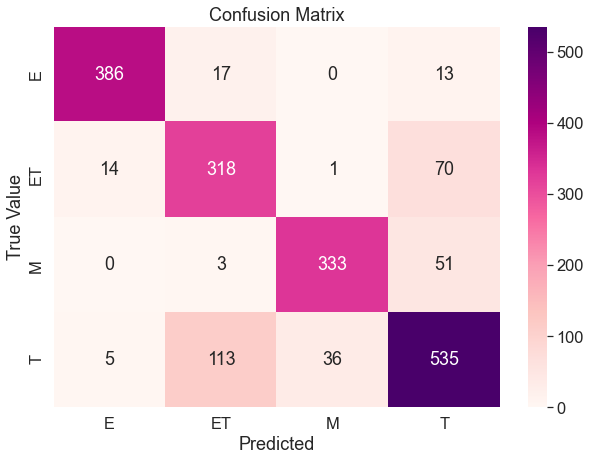

In [133]:
#heatmap of the confusion matrix for all ratings
df_cm = pd.DataFrame(cm, index = ["E", "ET", "M", "T"], columns = ["E", "ET", "M", "T"])

sn.set(font_scale=1.5)
plt.figure(figsize = (10,7))

ax = plt.axes()
ax.set_title('Confusion Matrix')
sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g', ax = ax)

plt.xlabel("Predicted")
plt.ylabel("True Value")

In [134]:
#sorting ratings by each class
ratings = ['E', 'ET', 'T', 'M']

y_train_E = (y_train == 'E') 
y_test_E = (y_test == 'E')
y_train_ET = (y_train == 'ET') 
y_test_ET = (y_test == 'ET')
y_train_T = (y_train == 'T') 
y_test_T = (y_test == 'T')
y_train_M = (y_train == 'M') 
y_test_M = (y_test == 'M')

In [135]:
#output confusion matrix by each rating class
y_train_pred_E = cross_val_predict(nb, X_train, y_train_E, cv=5)
y_train_pred_ET = cross_val_predict(nb, X_train, y_train_ET, cv=5)
y_train_pred_T = cross_val_predict(nb, X_train, y_train_T, cv=5)
y_train_pred_M = cross_val_predict(nb, X_train, y_train_M, cv=5)


cm_E = confusion_matrix(y_train_E, y_train_pred_E)
cm_ET = confusion_matrix(y_train_ET, y_train_pred_ET)
cm_T = confusion_matrix(y_train_T, y_train_pred_T)
cm_M = confusion_matrix(y_train_M, y_train_pred_M)

tn_E = cm_E[0][0]
fn_E = cm_E[1][0]
tp_E = cm_E[1][1]
fp_E = cm_E[0][1]

tn_ET = cm_ET[0][0]
fn_ET = cm_ET[1][0]
tp_ET = cm_ET[1][1]
fp_ET = cm_ET[0][1]

tn_T = cm_T[0][0]
fn_T = cm_T[1][0]
tp_T = cm_T[1][1]
fp_T = cm_T[0][1]

tn_M = cm_M[0][0]
fn_M = cm_M[1][0]
tp_M = cm_M[1][1]
fp_M = cm_M[0][1]

matrices = [cm_E, cm_ET, cm_T, cm_M]
i = -1
for matrix in matrices:
    i+=1
    print(ratings[i], "confusion matrix: \n", matrix, '\n')

E confusion matrix: 
 [[1462   17]
 [  41  375]] 

ET confusion matrix: 
 [[1362  130]
 [ 114  289]] 

T confusion matrix: 
 [[1072  134]
 [ 182  507]] 

M confusion matrix: 
 [[1461   47]
 [  53  334]] 



In [136]:
#accuracy for each rating class
score_E = cross_val_score(nb, X_train, y_train_E, cv=5, scoring="accuracy")
score_ET = cross_val_score(nb, X_train, y_train_ET, cv=5, scoring="accuracy")
score_T = cross_val_score(nb, X_train, y_train_T, cv=5, scoring="accuracy")
score_M = cross_val_score(nb, X_train, y_train_M, cv=5, scoring="accuracy")

accuracies  = [score_E, score_ET, score_T, score_M]
i = -1
for acc in accuracies:
    i+=1
    print("Accuracy of", ratings[i],'=', rounding(acc.mean()),"±", rounding(acc.std()))

Accuracy of E = 0.969 ± 0.009
Accuracy of ET = 0.871 ± 0.026
Accuracy of T = 0.833 ± 0.025
Accuracy of M = 0.947 ± 0.010


In [137]:
#precision for each class calculated from all ratings matrix
from sklearn.metrics import precision_score, recall_score, f1_score

TP = cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]
def precision (TP,FP):
    return TP/(TP+FP)


precision_E = precision (cm[0,0],cm[1,0]+cm[2,0]+cm[3,0])
precision_ET = precision (cm[1,1],cm[0,1]+cm[2,1]+cm[3,1])
precision_M = precision (cm[2,2],cm[0,2]+cm[1,2]+cm[3,2])
precision_T = precision (cm[3,3],cm[0,3]+cm[1,3]+cm[2,3])



precisions = [precision_E, precision_ET, precision_T, precision_M]
i = -1
for pre in precisions:
    i+=1
    print('Precision of',ratings[i],'=', rounding(pre)) 


Precision of E = 0.953
Precision of ET = 0.705
Precision of T = 0.800
Precision of M = 0.900


In [138]:
#precision for each class calculated from individual class model using precision_score
pre_E = precision_score(y_train_E, y_train_pred_E)
pre_ET = precision_score(y_train_ET, y_train_pred_ET)
pre_T = precision_score(y_train_T, y_train_pred_T)
pre_M = precision_score(y_train_M, y_train_pred_M)

precisions = [pre_E, pre_ET, pre_T, pre_M]
i = -1
for pre in precisions:
    i+=1
    print('Precision of',ratings[i],'=', rounding(pre))  

Precision of E = 0.957
Precision of ET = 0.690
Precision of T = 0.791
Precision of M = 0.877


In [139]:
#recall for each class calculated from all ratings matrix

def recall (TP,FN):
    return TP/(TP+FN)

recall_E = recall(cm[0,0], cm[0,1]+cm[0,2]+cm[0,3])
recall_ET = recall(cm[1,1], cm[1,0]+cm[1,2]+cm[1,3])
recall_M = recall(cm[2,2], cm[2,0]+cm[2,1]+cm[2,3])
recall_T = recall(cm[3,3], cm[3,0]+cm[3,1]+cm[3,2])

recalls = [recall_E , recall_ET, recall_M, recall_T]
i = -1
for re in recalls:
    i+=1
    print('Recall of',ratings[i],'=', rounding(re)) 


Recall of E = 0.928
Recall of ET = 0.789
Recall of T = 0.860
Recall of M = 0.776


In [140]:
#recall for each class calculated from individual class model using recall_score
re_E = recall_score(y_train_E, y_train_pred_E)
re_ET = recall_score(y_train_ET, y_train_pred_ET)
re_T = recall_score(y_train_T, y_train_pred_T)
re_M = recall_score(y_train_M, y_train_pred_M)

recalls = [re_E, re_ET, re_T, re_M]
i = -1
for re in recalls:
    i+=1
    print('Recall of',ratings[i],'=', rounding(re)) 

Recall of E = 0.901
Recall of ET = 0.717
Recall of T = 0.736
Recall of M = 0.863


In [141]:
#F score for each class calculated from all ratings matrix
def F1 (p,r):
    return 2*((p*r)/(p+r))

F1_score_E = F1(precision_E, recall_E)
F1_score_ET = F1(precision_ET, recall_ET)
F1_score_M = F1(precision_M, recall_M)
F1_score_T = F1(precision_T, recall_T)

F1_scores = [F1_score_E, F1_score_ET, F1_score_T, F1_score_M]
i = -1
for scores in F1_scores:
    i+=1
    print('F1 of',ratings[i],'=', rounding(scores)) 



F1 of E = 0.940
F1 of ET = 0.745
F1 of T = 0.788
F1 of M = 0.880


In [142]:
#F score for each class calculated from individual class model matrix using f1_score
F1_E = f1_score(y_train_E, y_train_pred_E)
F1_ET = f1_score(y_train_ET, y_train_pred_ET)
F1_T = f1_score(y_train_T, y_train_pred_T)
F1_M = f1_score(y_train_M, y_train_pred_M)

F_scores = [F1_E, F1_ET, F1_T, F1_M]
i = -1
for f in F_scores:
    i+=1
    print('F1 of',ratings[i],'=', rounding(f)) 

F1 of E = 0.928
F1 of ET = 0.703
F1 of T = 0.762
F1 of M = 0.870


In [143]:
#false positive rate for each class 
def fpr_calc(fp, tn):
    return fp/(fp+tn)
    
FPR_E = fpr_calc(fp_E, tn_E)
FPR_ET = fpr_calc(fp_ET, tn_ET)
FPR_T = fpr_calc(fp_T, tn_T)
FPR_M = fpr_calc(fp_M, tn_M)

FPRs = [FPR_E, FPR_ET, FPR_T, FPR_M]

i=-1
for FPR in FPRs:
    i+=1
    print('FP rate for', ratings[i],'=', rounding(FPR))

FP rate for E = 0.011
FP rate for ET = 0.087
FP rate for T = 0.111
FP rate for M = 0.031


The ROC score for E = 0.992
The ROC score for ET = 0.919
The ROC score for T = 0.895
The ROC score for M = 0.978


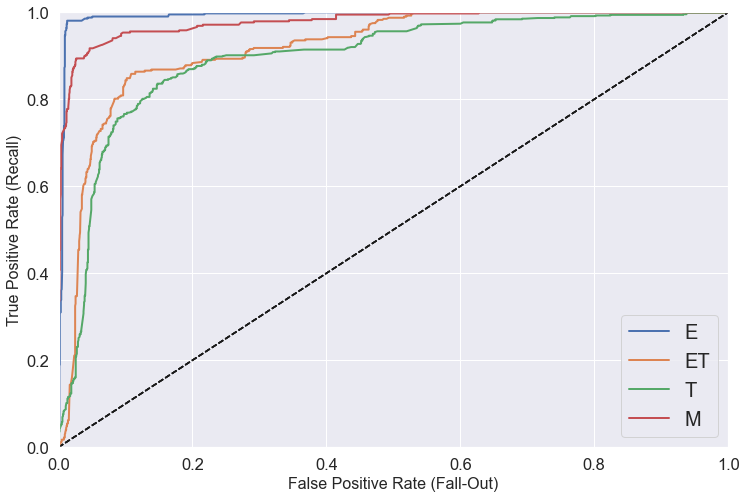

In [144]:
#ploting roc curve for each rating class
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)

y_scores_E = cross_val_predict(sgd, X_train, y_train_E, cv=5, method="decision_function")
y_scores_ET = cross_val_predict(sgd, X_train, y_train_ET, cv=5, method="decision_function")
y_scores_T = cross_val_predict(sgd, X_train, y_train_T, cv=5, method="decision_function")
y_scores_M = cross_val_predict(sgd, X_train, y_train_M, cv=5, method="decision_function")

fpr_E, tpr_E, thresholds_E = roc_curve(y_train_E, y_scores_E)
fpr_ET, tpr_ET, thresholds_ET = roc_curve(y_train_ET, y_scores_ET)
fpr_T, tpr_T, thresholds_T = roc_curve(y_train_T, y_scores_T)
fpr_M, tpr_M, thresholds_M = roc_curve(y_train_M, y_scores_M)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

    
plt.figure(figsize=(12, 8))
plot_roc_curve(fpr_E, tpr_E, label="E")
plot_roc_curve(fpr_ET, tpr_ET, label="ET")
plot_roc_curve(fpr_T, tpr_T, label="T")
plot_roc_curve(fpr_M, tpr_M, label="M")
plt.legend(loc="lower right", fontsize=20)

roc_score_E = roc_auc_score(y_train_E, y_scores_E)
roc_score_ET = roc_auc_score(y_train_ET, y_scores_ET)
roc_score_T = roc_auc_score(y_train_T, y_scores_T)
roc_score_M = roc_auc_score(y_train_M, y_scores_M)

roc_scores = [roc_score_E, roc_score_ET, roc_score_T, roc_score_M]

i=-1
for roc in roc_scores:
    i+=1
    print('The ROC score for', ratings[i], '=', rounding(roc))

In [145]:
#Selecting 3 data sets each with fewer strongest features
#this is done for M and T ratings
#all of the ablove calculations and analysis are performed for both ratins with the new data sets
print('For M rating the highest correlated features are:')
print('strong_language(0.7) \nblood_and_gore(0.54) \nstrong_sexual_content(0.33) \nsexual_themes(0.3) \nblood(0.24) \nintense_violence(0.23) \nsexual_content(0.18) \npartial_nudity(0.14)') 


X_train_M1 = data_train[['strong_language', 'blood_and_gore', 'strong_sexual_content', 'sexual_themes', 'blood', 'intense_violence', 'sexual_content', 'partial_nudity']]
X_train_M2 = data_train[['strong_language', 'blood_and_gore', 'strong_sexual_content', 'sexual_themes']]
X_train_M3 = data_train[['strong_language', 'blood_and_gore']]

ratings_M = ['M', 'M1', 'M2', 'M3']




For M rating the highest correlated features are:
strong_language(0.7) 
blood_and_gore(0.54) 
strong_sexual_content(0.33) 
sexual_themes(0.3) 
blood(0.24) 
intense_violence(0.23) 
sexual_content(0.18) 
partial_nudity(0.14)


In [146]:
# Confusion matrix for M rating sets
y_train_pred_M1 = cross_val_predict(nb, X_train_M1, y_train_M, cv=5)
cm_M1 = confusion_matrix(y_train_M, y_train_pred_M1)
y_train_pred_M2 = cross_val_predict(nb, X_train_M2, y_train_M, cv=5)
cm_M2 = confusion_matrix(y_train_M, y_train_pred_M2)
y_train_pred_M3 = cross_val_predict(nb, X_train_M3, y_train_M, cv=5)
cm_M3 = confusion_matrix(y_train_M, y_train_pred_M3)

cms = [cm_M, cm_M1, cm_M2, cm_M3]
i = -1
for cm in cms:
    i+=1
    print("Confusion Matrix of", ratings_M[i],'=\n', cm, '\n')

Confusion Matrix of M =
 [[1461   47]
 [  53  334]] 

Confusion Matrix of M1 =
 [[1479   29]
 [  90  297]] 

Confusion Matrix of M2 =
 [[1449   59]
 [  61  326]] 

Confusion Matrix of M3 =
 [[1450   58]
 [  55  332]] 



In [147]:
# Accuracy for each  M rating sets
score_M1 = cross_val_score(nb, X_train_M1, y_train_M, cv=5, scoring="accuracy")
score_M2 = cross_val_score(nb, X_train_M2, y_train_M, cv=5, scoring="accuracy")
score_M3 = cross_val_score(nb, X_train_M3, y_train_M, cv=5, scoring="accuracy")


accuracies_M  = [score_M, score_M1, score_M2, score_M3]
i = -1
for acc in accuracies_M:
    i+=1
    print("Accuracy of", ratings_M[i],'=', rounding(acc.mean()),"±", rounding(acc.std()))

Accuracy of M = 0.947 ± 0.010
Accuracy of M1 = 0.937 ± 0.011
Accuracy of M2 = 0.937 ± 0.007
Accuracy of M3 = 0.940 ± 0.005


In [148]:
# Precision score for each  M rating sets
pre_M1 = precision_score(y_train_M, y_train_pred_M1)
pre_M2 = precision_score(y_train_M, y_train_pred_M2)
pre_M3 = precision_score(y_train_M, y_train_pred_M3)

precisions_M = [pre_M, pre_M1, pre_M2, pre_M3]
i = -1
for pre in precisions_M:
    i+=1
    print('Precision of',ratings_M[i],'=', rounding(pre))  

Precision of M = 0.877
Precision of M1 = 0.911
Precision of M2 = 0.847
Precision of M3 = 0.851


In [149]:
# Recall score for each  M rating sets
re_M1 = recall_score(y_train_M, y_train_pred_M1)
re_M2 = recall_score(y_train_M, y_train_pred_M2)
re_M3 = recall_score(y_train_M, y_train_pred_M3)

recalls_M = [re_M, re_M1, re_M2, re_M3]
i = -1
for re in recalls_M:
    i+=1
    print('Recall of',ratings_M[i],'=', rounding(re)) 

Recall of M = 0.863
Recall of M1 = 0.767
Recall of M2 = 0.842
Recall of M3 = 0.858


In [150]:
# F1 score for each  M rating sets
F1_M1 = f1_score(y_train_M, y_train_pred_M1)
F1_M2 = f1_score(y_train_M, y_train_pred_M2)
F1_M3 = f1_score(y_train_M, y_train_pred_M3)

F_scores_M = [F1_M, F1_M1, F1_M2, F1_M3]
i = -1
for f in F_scores_M:
    i+=1
    print('F1 of',ratings_M[i],'=', rounding(f)) 

F1 of M = 0.870
F1 of M1 = 0.833
F1 of M2 = 0.845
F1 of M3 = 0.855


In [151]:
# FP for each  M rating sets
tn_M1 = cm_M1[0][0]
fn_M1 = cm_M1[1][0]
tp_M1 = cm_M1[1][1]
fp_M1 = cm_M1[0][1]

tn_M2 = cm_M2[0][0]
fn_M2 = cm_M2[1][0]
tp_M2 = cm_M2[1][1]
fp_M2 = cm_M2[0][1]

tn_M3 = cm_M3[0][0]
fn_M3 = cm_M3[1][0]
tp_M3 = cm_M3[1][1]
fp_M3 = cm_M3[0][1]


FPR_M1 = fpr_calc(fp_M1, tn_M1)
FPR_M2 = fpr_calc(fp_M2, tn_M2)
FPR_M3 = fpr_calc(fp_M3, tn_M3)

FPRs_M = [FPR_M, FPR_M1, FPR_M2, FPR_M3]

i=-1
for FPR in FPRs_M:
    i+=1
    print('FP rate for', ratings_M[i], '=', rounding(FPR))

FP rate for M = 0.031
FP rate for M1 = 0.019
FP rate for M2 = 0.039
FP rate for M3 = 0.038


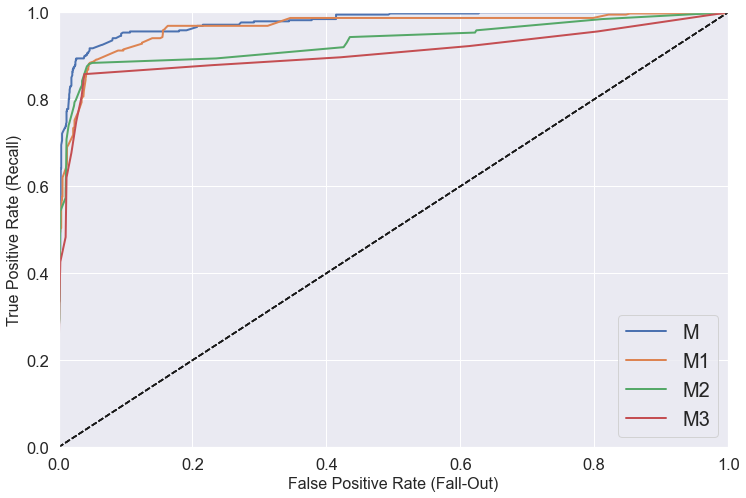

The ROC score for M = 0.978
The ROC score for M1 = 0.965
The ROC score for M2 = 0.932
The ROC score for M3 = 0.906


In [152]:
# ROC curve M rating sets
y_scores_M1 = cross_val_predict(sgd, X_train_M1, y_train_M, cv=5, method="decision_function")
y_scores_M2 = cross_val_predict(sgd, X_train_M2, y_train_M, cv=5, method="decision_function")
y_scores_M3 = cross_val_predict(sgd, X_train_M3, y_train_M, cv=5, method="decision_function")

fpr_M1, tpr_M1, thresholds_M1 = roc_curve(y_train_M, y_scores_M1)
fpr_M2, tpr_M2, thresholds_M2 = roc_curve(y_train_M, y_scores_M2)
fpr_M3, tpr_M3, thresholds_M2 = roc_curve(y_train_M, y_scores_M3)

                                      
plt.figure(figsize=(12, 8))
plot_roc_curve(fpr_M, tpr_M, label="M")
plot_roc_curve(fpr_M1, tpr_M1, label="M1")
plot_roc_curve(fpr_M2, tpr_M2, label="M2")
plot_roc_curve(fpr_M3, tpr_M3, label="M3")
plt.legend(loc="lower right", fontsize=20)    
plt.show()

roc_score_M1 = roc_auc_score(y_train_M, y_scores_M1)
roc_score_M2 = roc_auc_score(y_train_M, y_scores_M2)
roc_score_M3 = roc_auc_score(y_train_M, y_scores_M3)

roc_scores_M = [roc_score_M, roc_score_M1, roc_score_M2, roc_score_M3]

i=-1
for roc in roc_scores_M:
    i+=1
    print('The ROC score for', ratings_M[i], '=', rounding(roc))

In [153]:
#Selecting 3 data sets each with fewer strongest features
#this is done for M and T ratings
#all of the ablove calculations and analysis are performed for both ratins with the new data sets
print('For T rating the highest correlated features are:')
print('blood(0.29) \nsuggestive_themes(0.25) \nviolence(0.23) \ncrude_humor(0.15) \nlanguage(0.13) \nmild_blood(0.13) \nmild_suggestive_themes(0.18) \nsimulated_gambling(0.1)') 


X_train_T1 = data_train[['blood', 'suggestive_themes', 'violence', 'crude_humor', 'language', 'mild_blood', 'mild_suggestive_themes', 'simulated_gambling']]
X_train_T2 = data_train[['blood', 'suggestive_themes', 'violence', 'crude_humor']]
X_train_T3 = data_train[['blood', 'suggestive_themes']]


ratings_T = ['T', 'T1', 'T2', 'T3']

For T rating the highest correlated features are:
blood(0.29) 
suggestive_themes(0.25) 
violence(0.23) 
crude_humor(0.15) 
language(0.13) 
mild_blood(0.13) 
mild_suggestive_themes(0.18) 
simulated_gambling(0.1)


In [154]:
# Confusion Matrix each T rating sets
y_train_pred_T1 = cross_val_predict(nb, X_train_T1, y_train_M, cv=5)
cm_T1 = confusion_matrix(y_train_T, y_train_pred_T1)
y_train_pred_T2 = cross_val_predict(nb, X_train_T2, y_train_M, cv=5)
cm_T2 = confusion_matrix(y_train_T, y_train_pred_T2)
y_train_pred_T3 = cross_val_predict(nb, X_train_M3, y_train_M, cv=5)
cm_T3 = confusion_matrix(y_train_T, y_train_pred_T3)

cms = [cm_T, cm_T1, cm_T2, cm_T3]
i = -1
for cm in cms:
    i+=1
    print("Confusion Matrix of", ratings_T[i],'=\n', cm, '\n')

Confusion Matrix of T =
 [[1072  134]
 [ 182  507]] 

Confusion Matrix of T1 =
 [[1159   47]
 [ 652   37]] 

Confusion Matrix of T2 =
 [[1206    0]
 [ 689    0]] 

Confusion Matrix of T3 =
 [[873 333]
 [632  57]] 



In [155]:
# Accuracy for each T rating sets
score_T1 = cross_val_score(nb, X_train_T1, y_train_T, cv=5, scoring="accuracy")
score_T2 = cross_val_score(nb, X_train_T2, y_train_T, cv=5, scoring="accuracy")
score_T3 = cross_val_score(nb, X_train_T3, y_train_T, cv=5, scoring="accuracy")


accuracies_T  = [score_T, score_T1, score_T2, score_T3]
i = -1
for acc in accuracies_T:
    i+=1
    print("Accuracy of", ratings_T[i],'=', rounding(acc.mean()),"±", rounding(acc.std()))

Accuracy of T = 0.833 ± 0.025
Accuracy of T1 = 0.729 ± 0.020
Accuracy of T2 = 0.715 ± 0.011
Accuracy of T3 = 0.719 ± 0.045


In [156]:
# Precision score for each T rating sets
pre_T1 = precision_score(y_train_T, y_train_pred_T1)
pre_T2 = precision_score(y_train_T, y_train_pred_T2)
pre_T3 = precision_score(y_train_T, y_train_pred_T3)

precisions_T = [pre_T, pre_T1, pre_T2, pre_T3]
i = -1
for pre in precisions_T:
    i+=1
    print('Precision of',ratings_T[i],'=', rounding(pre))  

Precision of T = 0.791
Precision of T1 = 0.440
Precision of T2 = 0.000
Precision of T3 = 0.146


In [157]:
# Recall score for each T rating sets
re_T1 = recall_score(y_train_T, y_train_pred_T1)
re_T2= recall_score(y_train_T, y_train_pred_M2)
re_T3 = recall_score(y_train_T, y_train_pred_T3)

recalls_T = [re_M, re_T1, re_M2, re_T3]
i = -1
for re in recalls_T:
    i+=1
    print('Recall of',ratings_T[i],'=', rounding(re)) 

Recall of T = 0.863
Recall of T1 = 0.054
Recall of T2 = 0.842
Recall of T3 = 0.083


In [158]:
# F1 score for each T rating sets
F1_T1 = f1_score(y_train_T, y_train_pred_T1)
F1_T2 = f1_score(y_train_T, y_train_pred_T2)
F1_T3 = f1_score(y_train_T, y_train_pred_T3)

F_scores_T = [F1_T, F1_T1, F1_T2, F1_T3]
i = -1
for f in F_scores_T:
    i+=1
    print('F1 of',ratings_T[i],'=', rounding(f)) 

F1 of T = 0.762
F1 of T1 = 0.096
F1 of T2 = 0.000
F1 of T3 = 0.106


In [159]:
# FP rate for each T rating sets
tn_T1 = cm_T1[0][0]
fn_T1 = cm_T1[1][0]
tp_T1 = cm_T1[1][1]
fp_T1 = cm_T1[0][1]

tn_T2 = cm_T2[0][0]
fn_T2 = cm_T2[1][0]
tp_T2 = cm_T2[1][1]
fp_T2 = cm_T2[0][1]

tn_T3 = cm_T3[0][0]
fn_T3 = cm_T3[1][0]
tp_T3 = cm_T3[1][1]
fp_T3 = cm_T3[0][1]


FPR_T1 = fpr_calc(fp_T1, tn_T1)
FPR_T2 = fpr_calc(fp_T2, tn_T2)
FPR_T3 = fpr_calc(fp_T3, tn_T3)

FPRs_T = [FPR_T, FPR_T1, FPR_T2, FPR_T3]

i=-1
for FPR in FPRs_T:
    i+=1
    print('FP rate for', ratings_T[i], '=', rounding(FPR))

FP rate for T = 0.111
FP rate for T1 = 0.039
FP rate for T2 = 0.000
FP rate for T3 = 0.276


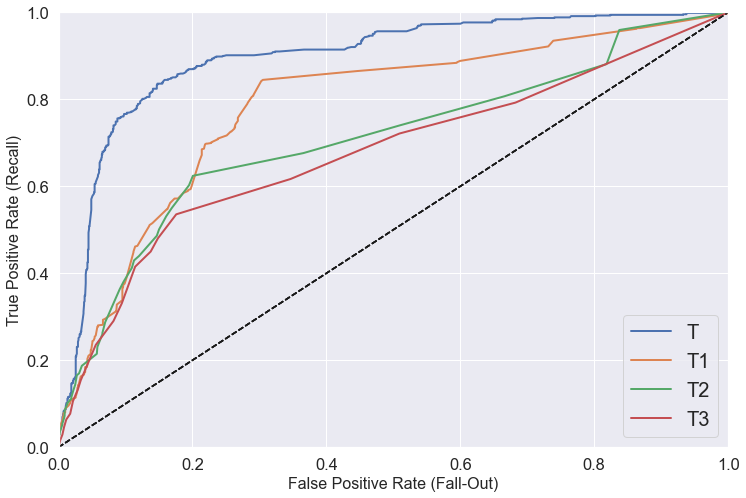

The ROC score for T = 0.895
The ROC score for T1 = 0.784
The ROC score for T2 = 0.708
The ROC score for T3 = 0.677


In [160]:
# ROC curve for each T rating sets
y_scores_T1 = cross_val_predict(sgd, X_train_T1, y_train_T, cv=5, method="decision_function")
y_scores_T2 = cross_val_predict(sgd, X_train_T2, y_train_T, cv=5, method="decision_function")
y_scores_T3 = cross_val_predict(sgd, X_train_T3, y_train_T, cv=5, method="decision_function")

fpr_T1, tpr_T1, thresholds_T1 = roc_curve(y_train_T, y_scores_T1)
fpr_T2, tpr_T2, thresholds_T2 = roc_curve(y_train_T, y_scores_T2)
fpr_T3, tpr_T3, thresholds_T2 = roc_curve(y_train_T, y_scores_T3)

                                      
plt.figure(figsize=(12, 8))
plot_roc_curve(fpr_T, tpr_T, label="T")
plot_roc_curve(fpr_T1, tpr_T1, label="T1")
plot_roc_curve(fpr_T2, tpr_T2, label="T2")
plot_roc_curve(fpr_T3, tpr_T3, label="T3")
plt.legend(loc="lower right", fontsize=20)    
plt.show()

roc_score_T1 = roc_auc_score(y_train_T, y_scores_T1)
roc_score_T2 = roc_auc_score(y_train_T, y_scores_T2)
roc_score_T3 = roc_auc_score(y_train_T, y_scores_T3)

roc_scores_T = [roc_score_T, roc_score_T1, roc_score_T2, roc_score_T3]

i=-1
for roc in roc_scores_T:
    i+=1
    print('The ROC score for', ratings_T[i], '=', rounding(roc))

In [161]:
# Sort data for clustter, new feature which is the sum of all other features
data_train_sorted = pd.read_csv("ESRB.csv")

data_train_cluster = data_train_sorted.drop(columns = ["title", "console","esrb_rating"])
cluster_feature1 = data_train_cluster[list(data_train_cluster.columns)].sum(axis=1)
cluster_feature1

0       1
1       3
2       3
3       3
4       3
       ..
1890    4
1891    2
1892    1
1893    1
1894    1
Length: 1895, dtype: int64

In [162]:
# Sort data for clustter, new feature which is the sum of the weighted values for all features
data_train_cluster = data_train_sorted.drop(columns = ["title", "console","esrb_rating"])
i = 0
for column in data_train_cluster:
    i += 0.1
    trans = {0 : 0, 1 : i}
    data_train_cluster[column] = data_train_cluster[column].map(trans)
    

cluster_feature2 = data_train_cluster[list(data_train_cluster.columns)].sum(axis=1)
cluster_feature2


0       2.0
1       2.9
2       5.7
3       3.1
4       4.6
       ... 
1890    8.1
1891    1.8
1892    2.0
1893    0.3
1894    2.0
Length: 1895, dtype: float64

In [163]:
X = pd.DataFrame({
     'col_1': cluster_feature1,'col_2': cluster_feature2})
X

,col_1,col_2
0,1,2.0
1,3,2.9
2,3,5.7
3,3,3.1
4,3,4.6
...,...,...
1890,4,8.1
1891,2,1.8
1892,1,2.0
1893,1,0.3


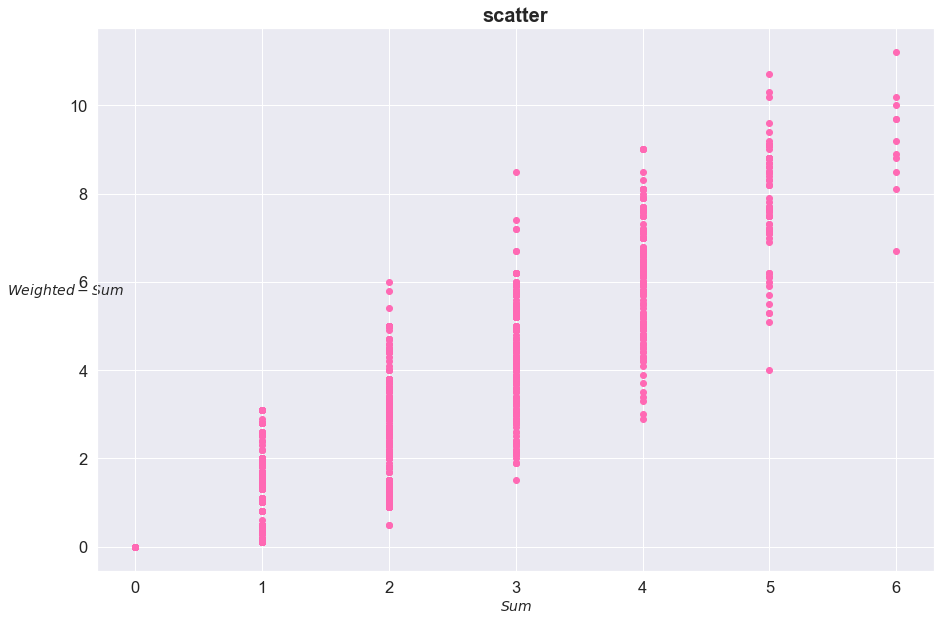

In [164]:
# Plot scatter, the 2 new features as axis
def plot_clusters():
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1],color = 'hotpink')
    plt.xlabel("$Sum$", fontsize=14)
    plt.ylabel("$Weighted-Sum$", fontsize=14, rotation=0)
    
plt.figure(figsize=(15, 10))
plot_clusters()
plt.title('scatter', fontsize=20, fontweight='demi') 
plt.show()

In [165]:
# Set Kmeans
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([3, 1, 2, ..., 3, 3, 3])

In [166]:
y_pred is kmeans.labels_

True

In [167]:
kmeans.cluster_centers_

array([[4.4744898 , 7.54183673],
       [1.99593496, 2.81504065],
       [3.18767507, 4.74201681],
       [1.09058824, 1.27247059]])

In [168]:
kmeans.labels_

array([3, 1, 2, ..., 3, 3, 3])

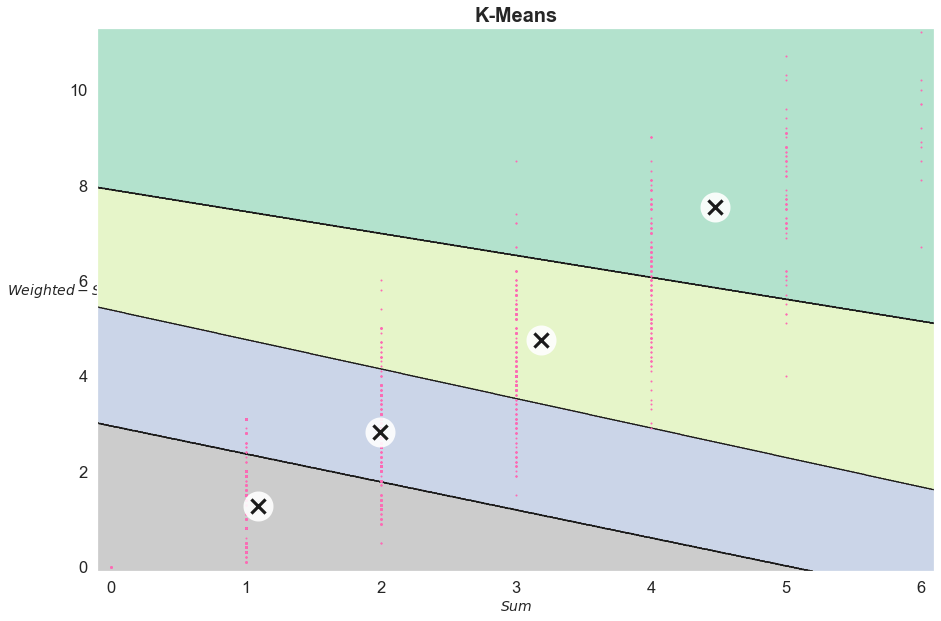

In [169]:
# Plot scatter with boundries
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2, c = 'hotpink')

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=100, linewidths=20,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=5, linewidths=20,
                color=cross_color, zorder=11, alpha=1)
    plt.title('K-Means', fontsize=20, fontweight='demi')   

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$Sum$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$Weighted-Sum$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
     
plt.figure(figsize=(15, 10))
plot_decision_boundaries(kmeans, X)
plt.show()

In [170]:
# Iterations for scatter
kmeans_iter1 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=4, n_init=1,
       random_state=1)

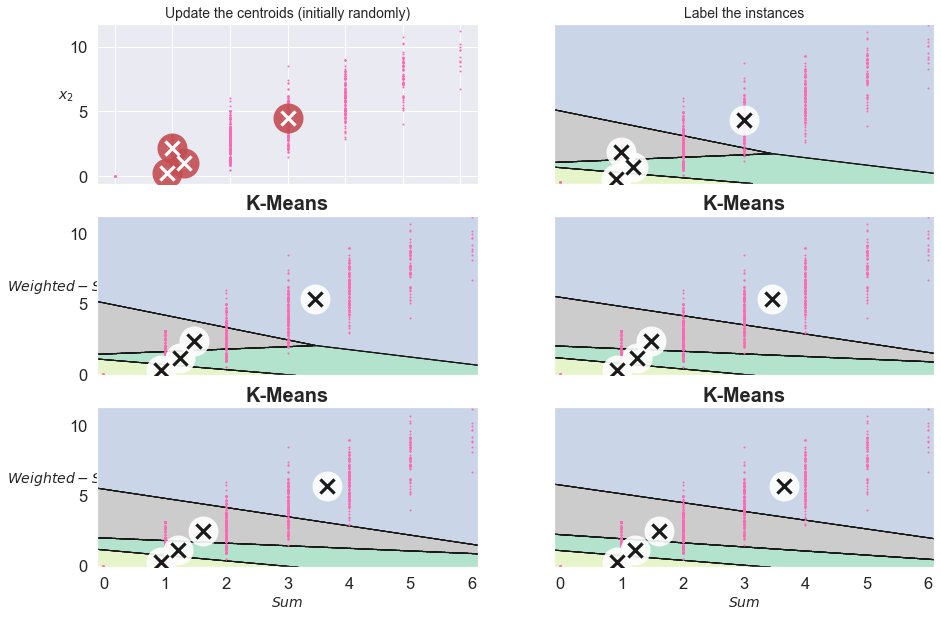

In [171]:
# Plot different iterations for scatter
plt.figure(figsize=(15, 10))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [172]:
# Inertia scores
kmeans.inertia_

1354.5659927151357

In [173]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

1354.5659927151348

In [174]:
kmeans.score(X)

-1354.5659927151357

In [175]:
kmeans_rnd_10_inits = KMeans(n_clusters=4, init="random", n_init=10,
                              algorithm="full", random_state=42)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=4, random_state=42)

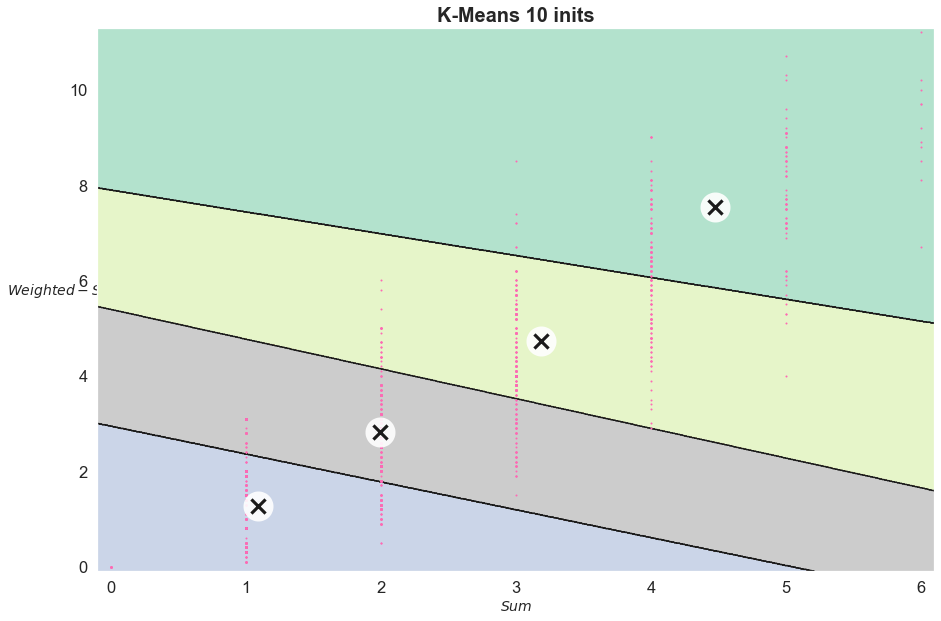

In [176]:
# Plot 10 inits 
plt.figure(figsize=(15, 10))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.title('K-Means 10 inits', fontsize=20, fontweight='demi') 
plt.show()

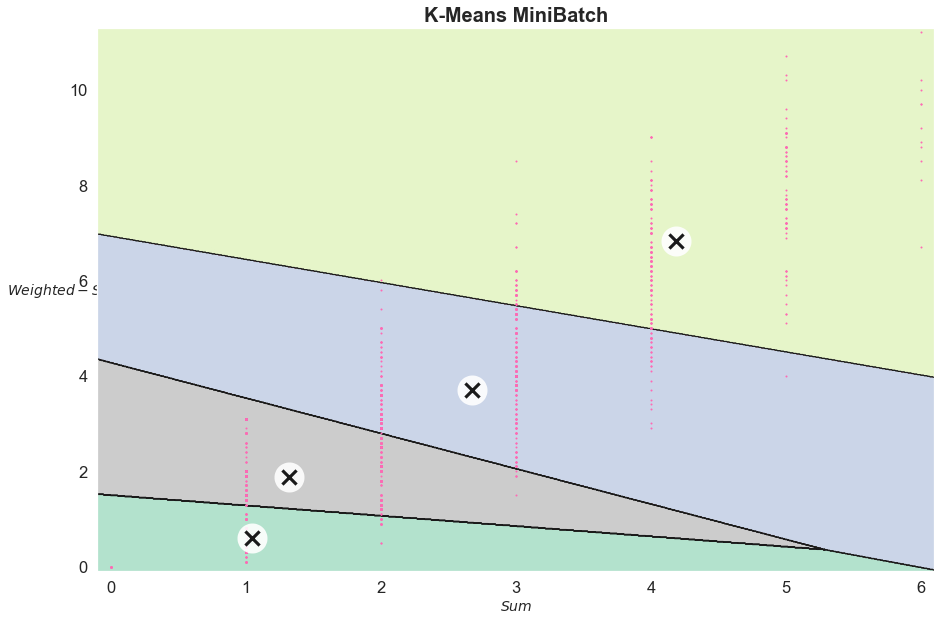

In [177]:
# Plot miniBatch Kmeans
from sklearn.cluster import MiniBatchKMeans
kmeansMiniBatch = MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=6, max_iter=10).fit(X)
plt.figure(figsize=(15, 10))
plot_decision_boundaries(kmeansMiniBatch, X)
plt.title('K-Means MiniBatch', fontsize=20, fontweight='demi') 
plt.show()

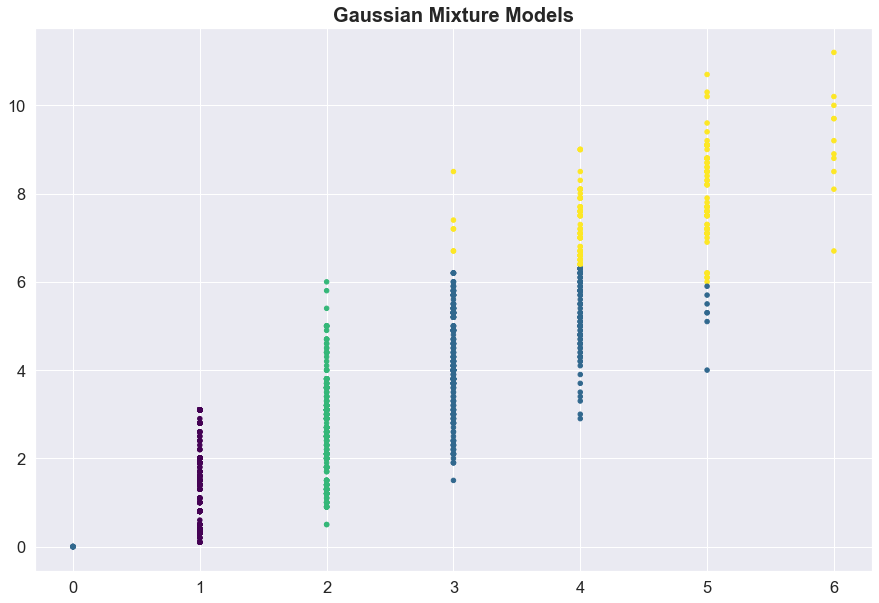

In [178]:
# Plot GMM 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.figure(figsize=(15, 10))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=20, cmap='viridis');
plt.title('Gaussian Mixture Models', fontsize=20, fontweight='demi') 
plt.show()

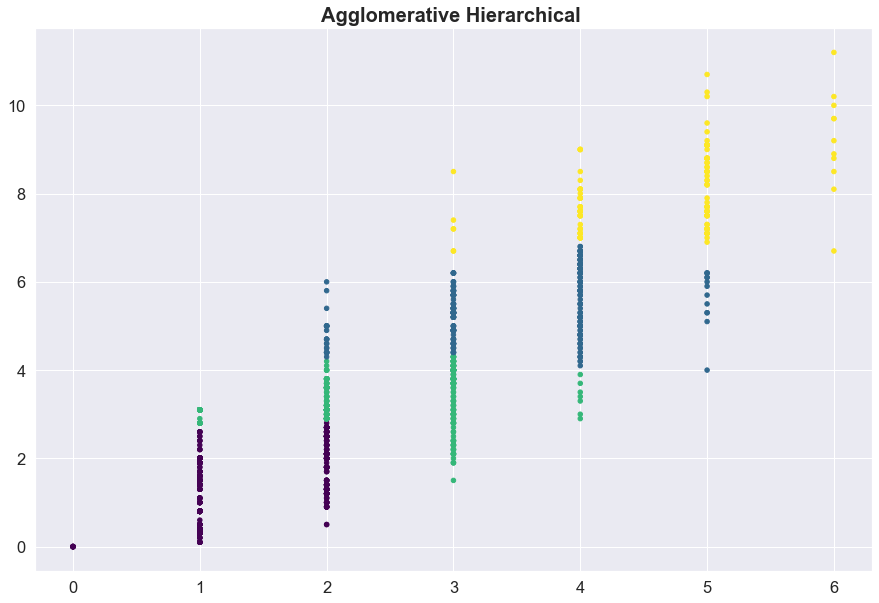

In [179]:
# Plot Hierarachical 
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.figure(figsize=(15, 10))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster.labels_, s=20, cmap='viridis')
plt.title('Agglomerative Hierarchical ', fontsize=20, fontweight='demi') 
plt.show()

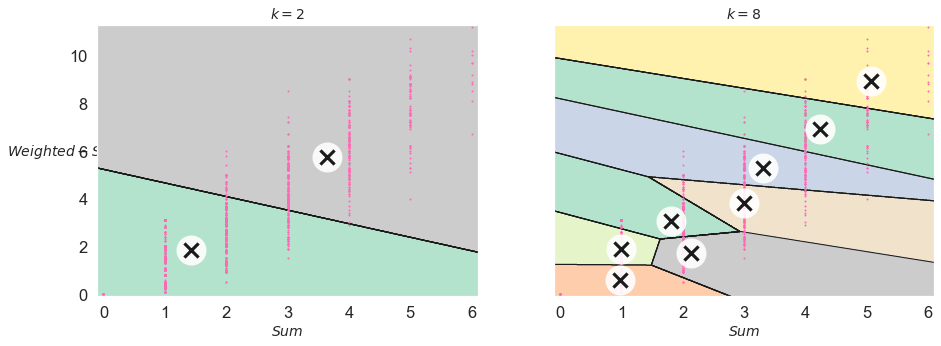

In [180]:
# Plot different number of K-means clusters
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)
kmeans_k2 = KMeans(n_clusters=2, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k2, kmeans_k8, X, "$k=2$", "$k=8$")
plt.show()

In [181]:
# Innertia for 2 clusters
kmeans_k2.inertia_

3552.8195911235707

In [182]:
# Innertia for 8 clusters
kmeans_k8.inertia_

553.0565384445395

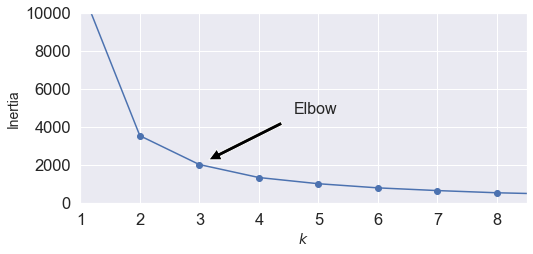

In [183]:
# Elbow for K-means clusttering
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 10000])
plt.show()

In [184]:
# Accuracy of 2 new features only
score = cross_val_score(nb, X, y_train, cv=5, scoring="accuracy")
print(score)
print("Accuracy: ", rounding(score.mean()),"±", rounding(score.std()))

[0.55672823 0.56728232 0.5883905         nan 0.58047493]
Accuracy:  nan ± nan


In [185]:
# Import and train decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

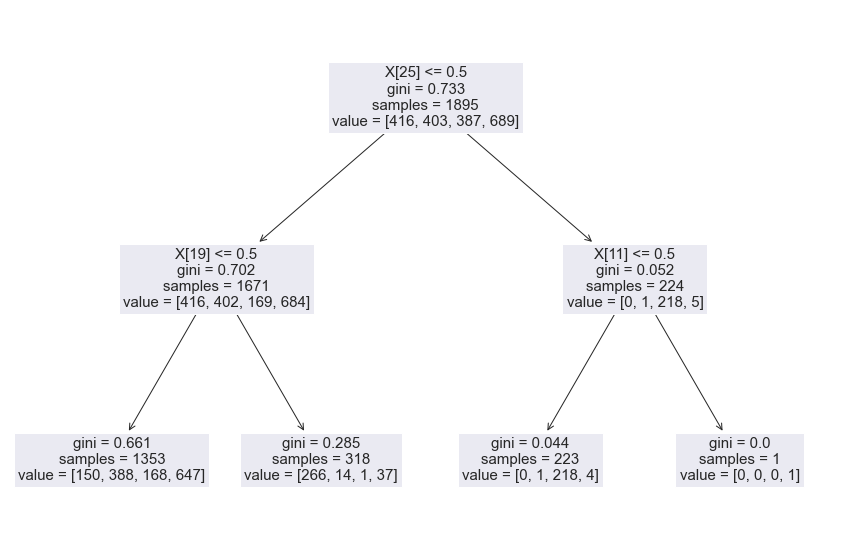

In [186]:
# Plot Tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_clf, fontsize=15)
plt.show()

In [187]:
#output confusion matrix by each rating class
y_train_pred_E = cross_val_predict(tree_clf, X_train, y_train_E, cv=10)
y_train_pred_ET = cross_val_predict(tree_clf, X_train, y_train_ET, cv=10)
y_train_pred_T = cross_val_predict(tree_clf, X_train, y_train_T, cv=10)
y_train_pred_M = cross_val_predict(tree_clf, X_train, y_train_M, cv=10)


cm_E = confusion_matrix(y_train_E, y_train_pred_E)
cm_ET = confusion_matrix(y_train_ET, y_train_pred_ET)
cm_T = confusion_matrix(y_train_T, y_train_pred_T)
cm_M = confusion_matrix(y_train_M, y_train_pred_M)

tn_E = cm_E[0][0]
fn_E = cm_E[1][0]
tp_E = cm_E[1][1]
fp_E = cm_E[0][1]

tn_ET = cm_ET[0][0]
fn_ET = cm_ET[1][0]
tp_ET = cm_ET[1][1]
fp_ET = cm_ET[0][1]

tn_T = cm_T[0][0]
fn_T = cm_T[1][0]
tp_T = cm_T[1][1]
fp_T = cm_T[0][1]

tn_M = cm_M[0][0]
fn_M = cm_M[1][0]
tp_M = cm_M[1][1]
fp_M = cm_M[0][1]

matrices = [cm_E, cm_ET, cm_T, cm_M]
i = -1
for matrix in matrices:
    i+=1
    print(ratings[i], "confusion matrix: \n", matrix, '\n')

E confusion matrix: 
 [[1422   57]
 [  73  343]] 

ET confusion matrix: 
 [[1365  127]
 [ 147  256]] 

T confusion matrix: 
 [[1126   80]
 [ 350  339]] 

M confusion matrix: 
 [[1450   58]
 [  59  328]] 



In [188]:
# Accuracy for each rating class
score_E = cross_val_score(tree_clf, X_train, y_train_E, cv=10, scoring="accuracy")
score_ET = cross_val_score(tree_clf, X_train, y_train_ET, cv=10, scoring="accuracy")
score_T = cross_val_score(tree_clf, X_train, y_train_T, cv=10, scoring="accuracy")
score_M = cross_val_score(tree_clf, X_train, y_train_M, cv=10, scoring="accuracy")

accuracies  = [score_E, score_ET, score_T, score_M]
i = -1
for acc in accuracies:
    i+=1
    print("Accuracy of", ratings[i],'=', rounding(acc.mean()),"±", rounding(acc.std()))
print('\n')

#precision for each class calculated from individual class model using precision_score
pre_E = precision_score(y_train_E, y_train_pred_E)
pre_ET = precision_score(y_train_ET, y_train_pred_ET)
pre_T = precision_score(y_train_T, y_train_pred_T)
pre_M = precision_score(y_train_M, y_train_pred_M)

precisions = [pre_E, pre_ET, pre_T, pre_M]
i = -1
for pre in precisions:
    i+=1
    print('Precision of',ratings[i],'=', rounding(pre))
print('\n')

#recall for each class calculated from individual class model using recall_score
re_E = recall_score(y_train_E, y_train_pred_E)
re_ET = recall_score(y_train_ET, y_train_pred_ET)
re_T = recall_score(y_train_T, y_train_pred_T)
re_M = recall_score(y_train_M, y_train_pred_M)

recalls = [re_E, re_ET, re_T, re_M]
i = -1
for re in recalls:
    i+=1
    print('Recall of',ratings[i],'=', rounding(re))
print('\n')
    
#F score for each class calculated from individual class model matrix using f1_score
F1_E = f1_score(y_train_E, y_train_pred_E)
F1_ET = f1_score(y_train_ET, y_train_pred_ET)
F1_T = f1_score(y_train_T, y_train_pred_T)
F1_M = f1_score(y_train_M, y_train_pred_M)

F_scores = [F1_E, F1_ET, F1_T, F1_M]
i = -1
for f in F_scores:
    i+=1
    print('F1 of',ratings[i],'=', rounding(f)) 
print('\n')
    
#false positive rate for each class 
def fpr_calc(fp, tn):
    return fp/(fp+tn)
    
FPR_E = fpr_calc(fp_E, tn_E)
FPR_ET = fpr_calc(fp_ET, tn_ET)
FPR_T = fpr_calc(fp_T, tn_T)
FPR_M = fpr_calc(fp_M, tn_M)

FPRs = [FPR_E, FPR_ET, FPR_T, FPR_M]

i=-1
for FPR in FPRs:
    i+=1
    print('FP rate for', ratings[i],'=', rounding(FPR))
print('\n')

Accuracy of E = 0.931 ± 0.016
Accuracy of ET = 0.855 ± 0.042
Accuracy of T = 0.773 ± 0.036
Accuracy of M = 0.938 ± 0.013


Precision of E = 0.858
Precision of ET = 0.668
Precision of T = 0.809
Precision of M = 0.850


Recall of E = 0.825
Recall of ET = 0.635
Recall of T = 0.492
Recall of M = 0.848


F1 of E = 0.841
F1 of ET = 0.651
F1 of T = 0.612
F1 of M = 0.849


FP rate for E = 0.039
FP rate for ET = 0.085
FP rate for T = 0.066
FP rate for M = 0.038




In [189]:
# Alter decision tree depth, compare accuracy of training and testing sets
depth = 2
for i in range(10):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)

    score = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="accuracy")
    print('Using Training Set, DT accuracy at depth', depth, ': ', rounding(score.mean()),'%')

    pred = tree_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Using Test set, DT accuracy:',accuracy,'%','\n')
    
    depth+=2

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

score = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="accuracy")
print('Using Training Set, DT accuracy at defualt: ', rounding(score.mean()),'%')

pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Using Test set, DT accuracy:',accuracy,'%','\n')

Using Training Set, DT accuracy at depth 2 :  0.596 %
Using Test set, DT accuracy: 0.494 % 

Using Training Set, DT accuracy at depth 4 :  0.733 %
Using Test set, DT accuracy: 0.684 % 

Using Training Set, DT accuracy at depth 6 :  0.769 %
Using Test set, DT accuracy: 0.77 % 

Using Training Set, DT accuracy at depth 8 :  0.790 %
Using Test set, DT accuracy: 0.774 % 

Using Training Set, DT accuracy at depth 10 :  0.793 %
Using Test set, DT accuracy: 0.774 % 

Using Training Set, DT accuracy at depth 12 :  0.817 %
Using Test set, DT accuracy: 0.798 % 

Using Training Set, DT accuracy at depth 14 :  0.828 %
Using Test set, DT accuracy: 0.814 % 

Using Training Set, DT accuracy at depth 16 :  0.839 %
Using Test set, DT accuracy: 0.814 % 

Using Training Set, DT accuracy at depth 18 :  0.848 %
Using Test set, DT accuracy: 0.816 % 

Using Training Set, DT accuracy at depth 20 :  0.852 %
Using Test set, DT accuracy: 0.828 % 

Using Training Set, DT accuracy at defualt:  0.860 %
Using Test s

In [190]:
# Alter decision tree splitter, compare accuracy of training and testing sets
tree_clf = DecisionTreeClassifier(splitter='random', random_state=42, max_depth=5)
tree_clf.fit(X_train, y_train)

score = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="accuracy")
print('Using Training Set, splitter = random, DT accuracy: ', rounding(score.mean()),'%')

pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Using Test set, DT accuracy:',accuracy,'%','\n')

tree_clf = DecisionTreeClassifier(splitter='best',random_state=42, max_depth=5)
tree_clf.fit(X_train, y_train)

score = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="accuracy")
print('Using Training Set, splitter = best, DT accuracy: ', rounding(score.mean()),'%')

pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Using Test set, DT accuracy:',accuracy,'%','\n')

Using Training Set, splitter = random, DT accuracy:  0.764 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, splitter = best, DT accuracy:  0.765 %
Using Test set, DT accuracy: 0.766 % 



In [191]:
# Alter decision criterion, compare accuracy of training and testing sets
tree_clf = DecisionTreeClassifier(criterion = "entropy", random_state=42, max_depth=5)
tree_clf.fit(X_train, y_train)

score = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="accuracy")
print('Using Training Set, criterion = "entropy", DT accuracy: ', rounding(score.mean()),'%')

pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Using Test set, DT accuracy:',accuracy,'%','\n')

tree_clf = DecisionTreeClassifier(criterion = "gini",random_state=42, max_depth=5)
tree_clf.fit(X_train, y_train)

score = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="accuracy")
print('Using Training Set, criterion = "gini", DT accuracy: ', rounding(score.mean()),'%')

pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Using Test set, DT accuracy:',accuracy,'%','\n')

Using Training Set, criterion = "entropy", DT accuracy:  0.724 %
Using Test set, DT accuracy: 0.718 % 

Using Training Set, criterion = "gini", DT accuracy:  0.765 %
Using Test set, DT accuracy: 0.766 % 



In [192]:
# Alter decision tree minmal sample leaf, compare accuracy of training and testing sets
leaf = 1
for i in range(10):
    tree_clf = DecisionTreeClassifier(min_samples_leaf = leaf, random_state=42, max_depth=5)
    tree_clf.fit(X_train, y_train)

    score = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="accuracy")
    print('Using Training Set, DT accuracy at min_samples_leaf', leaf, ': ', rounding(score.mean()),'%')

    pred = tree_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Using Test set, DT accuracy:',accuracy,'%','\n')
    
    leaf+=1

Using Training Set, DT accuracy at min_samples_leaf 1 :  0.765 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_leaf 2 :  0.766 %
Using Test set, DT accuracy: 0.768 % 

Using Training Set, DT accuracy at min_samples_leaf 3 :  0.763 %
Using Test set, DT accuracy: 0.768 % 

Using Training Set, DT accuracy at min_samples_leaf 4 :  0.763 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_leaf 5 :  0.762 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_leaf 6 :  0.764 %
Using Test set, DT accuracy: 0.762 % 

Using Training Set, DT accuracy at min_samples_leaf 7 :  0.765 %
Using Test set, DT accuracy: 0.762 % 

Using Training Set, DT accuracy at min_samples_leaf 8 :  0.765 %
Using Test set, DT accuracy: 0.76 % 

Using Training Set, DT accuracy at min_samples_leaf 9 :  0.765 %
Using Test set, DT accuracy: 0.76 % 

Using Training Set, DT accuracy at min_samples_leaf 10 :  0.763 %


In [193]:
# Alter decision tree minimal sample split, compare accuracy of training and testing sets
split = 2
for i in range(10):
    tree_clf = DecisionTreeClassifier(min_samples_split = split, random_state=42, max_depth=5)
    tree_clf.fit(X_train, y_train)

    score = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="accuracy")
    print('Using Training Set, DT accuracy at min_samples_split', split, ': ', rounding(score.mean()),'%')

    pred = tree_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Using Test set, DT accuracy:',accuracy,'%','\n')
    
    split+=1

Using Training Set, DT accuracy at min_samples_split 2 :  0.765 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_split 3 :  0.765 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_split 4 :  0.765 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_split 5 :  0.765 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_split 6 :  0.765 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_split 7 :  0.765 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_split 8 :  0.765 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_split 9 :  0.764 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_split 10 :  0.764 %
Using Test set, DT accuracy: 0.766 % 

Using Training Set, DT accuracy at min_samples_split 1

In [194]:
# Compare Naive Bayes, Decision Tree and Random Forest accuracy on testing and training sets
tree_clf = DecisionTreeClassifier(random_state=42)
forest_clf = RandomForestClassifier(random_state=42)
nb = CategoricalNB()
nb.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
forest_clf.fit(X_train, y_train)

score = cross_val_score(nb, X_train, y_train, cv=10, scoring="accuracy")
print('Using Training Set, NB accuracy:', rounding(score.mean()),'%')

pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Using Test set, NB accuracy:',accuracy,'%','\n')

score = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="accuracy")
print('Using Training Set, DT accuracy:', rounding(score.mean()),'%')

pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Using Test set, DT accuracy:',accuracy,'%','\n')

score = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring="accuracy")
print('Using Training Set, RF accuracy:', rounding(score.mean()),'%')

pred = forest_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Using Test set, RF accuracy:',accuracy,'%','\n')

Using Training Set, NB accuracy: 0.833 %
Using Test set, NB accuracy: 0.818 % 

Using Training Set, DT accuracy: 0.860 %
Using Test set, DT accuracy: 0.826 % 

Using Training Set, RF accuracy: 0.868 %
Using Test set, RF accuracy: 0.85 % 



In [195]:
# Alter decision tree test/training split ratio from 9:1 to 1:9, compare accuracy of training and testing sets
size = float(0.1)
for i in range(9):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = size)
    tree_clf.fit(X_train_split, y_train_split)

    pred = tree_clf.predict(X_test_split)
    accuracy = accuracy_score(y_test_split, pred)
    print('Using split Test set at', rounding(size), ', DT accuracy:',accuracy,'%','\n')
    size += 0.1

Using split Test set at 0.100 , DT accuracy: 0.8526315789473684 % 

Using split Test set at 0.200 , DT accuracy: 0.8469656992084432 % 

Using split Test set at 0.300 , DT accuracy: 0.836555360281195 % 

Using split Test set at 0.400 , DT accuracy: 0.8456464379947229 % 

Using split Test set at 0.500 , DT accuracy: 0.8481012658227848 % 

Using split Test set at 0.600 , DT accuracy: 0.8056288478452067 % 

Using split Test set at 0.700 , DT accuracy: 0.7950263752825923 % 

Using split Test set at 0.800 , DT accuracy: 0.8034300791556728 % 

Using split Test set at 0.900 , DT accuracy: 0.8118405627198124 % 



In [196]:
size = float(0.1)
for i in range(9):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = size)
    forest_clf.fit(X_train_split, y_train_split)

    pred = forest_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Using split Test set at', rounding(size), ', RF accuracy:',accuracy,'%','\n')
    size += 0.1

Using split Test set at 0.100 , RF accuracy: 0.85 % 

Using split Test set at 0.200 , RF accuracy: 0.844 % 

Using split Test set at 0.300 , RF accuracy: 0.858 % 

Using split Test set at 0.400 , RF accuracy: 0.842 % 

Using split Test set at 0.500 , RF accuracy: 0.824 % 

Using split Test set at 0.600 , RF accuracy: 0.828 % 

Using split Test set at 0.700 , RF accuracy: 0.802 % 

Using split Test set at 0.800 , RF accuracy: 0.8 % 

Using split Test set at 0.900 , RF accuracy: 0.78 % 



In [197]:
# SGD accuracy using training and testing sets
sgd = SGDClassifier(max_iter=1000, random_state=42)
sgd.fit(X_train, y_train)

score = cross_val_score(sgd, X_train, y_train, cv=10, scoring="accuracy")
print('Using Training Set, SGD accuracy:', rounding(score.mean()),'%')

pred = sgd.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Using Test set, SGD accuracy:',accuracy,'%','\n')

Using Training Set, SGD accuracy: 0.843 %
Using Test set, SGD accuracy: 0.806 % 



In [198]:
# Perceptron accuracy on training and testing set
from sklearn.linear_model import Perceptron
per = Perceptron(tol=1e-3, random_state=42)
per.fit(X_train, y_train)

pred = per.predict(X_train)
accuracy = accuracy_score(y_train, pred)
print('Using Training set, perceptron accuracy:',rounding(accuracy),'%')

pred = per.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Using Test set, perceptron accuracy:',accuracy,'%','\n')


Using Training set, perceptron accuracy: 0.853 %
Using Test set, perceptron accuracy: 0.792 % 



In [199]:
# MLP accuracy on training and testing set
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42).fit(X_train, y_train)

pred = mlp.predict(X_train)
accuracy = accuracy_score(y_train, pred)
print('MLP defult settings training accuracy:',rounding(accuracy),'%')

pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('MLP defult settings testing accuracy:',accuracy,'%','\n')

MLP defult settings training accuracy: 0.916 %
MLP defult settings testing accuracy: 0.842 % 



In [200]:
# Altering mlp interations and calculating accuracy on training and testing set
iteration = 200
for i in range(5):
    mlp = MLPClassifier(random_state=42, max_iter = iteration )
    mlp.fit(X_train, y_train)
    
    pred = mlp.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    print('MLP training accuracy at', iteration, 'iterations: ',rounding(accuracy),'%')

    pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('MLP testing accuracy at', iteration, 'iterations: ',accuracy,'%','\n')
    
    iteration+=50

MLP training accuracy at 200 iterations:  0.916 %
MLP testing accuracy at 200 iterations:  0.842 % 

MLP training accuracy at 250 iterations:  0.916 %
MLP testing accuracy at 250 iterations:  0.844 % 

MLP training accuracy at 300 iterations:  0.917 %
MLP testing accuracy at 300 iterations:  0.844 % 

MLP training accuracy at 350 iterations:  0.918 %
MLP testing accuracy at 350 iterations:  0.844 % 

MLP training accuracy at 400 iterations:  0.917 %
MLP testing accuracy at 400 iterations:  0.844 % 



In [201]:
# Altering mlp activation functions and calculating accuracy on training and testing set
activations = ['identity', 'logistic', 'tanh', 'relu']
i = -1
for act in activations:
    i+=1
    mlp = MLPClassifier(random_state=42, activation = act )
    mlp.fit(X_train, y_train)
    
    pred = mlp.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    print('MLP training accuracy using', act, 'activation fucntion:',rounding(accuracy),'%')


    pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('MLP Testing accuracy using', act, 'activation fucntion:',accuracy,'%','\n')
    


MLP training accuracy using identity activation fucntion: 0.864 %
MLP Testing accuracy using identity activation fucntion: 0.818 % 

MLP training accuracy using logistic activation fucntion: 0.868 %
MLP Testing accuracy using logistic activation fucntion: 0.82 % 

MLP training accuracy using tanh activation fucntion: 0.881 %
MLP Testing accuracy using tanh activation fucntion: 0.82 % 

MLP training accuracy using relu activation fucntion: 0.916 %
MLP Testing accuracy using relu activation fucntion: 0.842 % 



In [202]:
# Altering mlp optmisers and calculating accuracy on training and testing set
solvers = ['lbfgs', 'sgd', 'adam']
i = -1
for s in solvers:
    i+=1
    mlp = MLPClassifier(random_state=42, solver = s )
    mlp.fit(X_train, y_train)
    
    pred = mlp.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    print('MLP training accuracy using', s, 'solver:',rounding(accuracy),'%')

    pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('MLP testing accuracy using', s, 'solver:',accuracy,'%','\n')

MLP training accuracy using lbfgs solver: 0.918 %
MLP testing accuracy using lbfgs solver: 0.82 % 

MLP training accuracy using sgd solver: 0.812 %
MLP testing accuracy using sgd solver: 0.752 % 

MLP training accuracy using adam solver: 0.916 %
MLP testing accuracy using adam solver: 0.842 % 



In [203]:
# Altering mlp learning rate value and calculating accuracy on training and testing set
leanring_rate = 0.0001
for i in range(5):
    mlp = MLPClassifier(random_state=42, alpha = leanring_rate )
    mlp.fit(X_train, y_train)
    
    pred = mlp.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    print('MLP training accuracy using', leanring_rate, 'learning rate:',rounding(accuracy),'%')

    pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('MLP testing accuracy at', leanring_rate, 'learning rate:',accuracy,'%','\n')
    
    leanring_rate+= 0.2

MLP training accuracy using 0.0001 learning rate: 0.916 %
MLP testing accuracy at 0.0001 learning rate: 0.842 % 

MLP training accuracy using 0.2001 learning rate: 0.908 %
MLP testing accuracy at 0.2001 learning rate: 0.84 % 

MLP training accuracy using 0.4001 learning rate: 0.901 %
MLP testing accuracy at 0.4001 learning rate: 0.834 % 

MLP training accuracy using 0.6001000000000001 learning rate: 0.884 %
MLP testing accuracy at 0.6001000000000001 learning rate: 0.828 % 

MLP training accuracy using 0.8001 learning rate: 0.879 %
MLP testing accuracy at 0.8001 learning rate: 0.818 % 



In [204]:
# Altering mlp learning rate type and calculating accuracy on training and testing set
leanrning_rate = ['constant', 'invscaling', 'adaptive']
i = -1
for lr in leanrning_rate:
    i+=1
    mlp = MLPClassifier(random_state=42, learning_rate = lr )
    mlp.fit(X_train, y_train)
    
    pred = mlp.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    print('MLP training accuracy using', lr, 'learning rate:',rounding(accuracy),'%')

    pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('MLP testing accuracy using', lr, 'learning rate:',accuracy,'%','\n')

MLP training accuracy using constant learning rate: 0.916 %
MLP testing accuracy using constant learning rate: 0.842 % 

MLP training accuracy using invscaling learning rate: 0.916 %
MLP testing accuracy using invscaling learning rate: 0.842 % 

MLP training accuracy using adaptive learning rate: 0.916 %
MLP testing accuracy using adaptive learning rate: 0.842 % 



In [205]:
# Altering mlp hidden layer structures and calculating accuracy on training and testing set
layers = ((2),(10),(100),(2,2),(10,10),(100,100),(2,2,2),(10,10,10),(100,100,100))
i=0
for layer in layers:
    mlp = MLPClassifier(random_state=42, hidden_layer_sizes = layers[i] )
    mlp.fit(X_train, y_train)
    
    pred = mlp.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    print('MLP training accuracy at', layers[i], 'layers:',rounding(accuracy),'%')

    pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('MLP accuracy at', layers[i], 'layers:',accuracy,'%','\n')
    i+=1

MLP training accuracy at 2 layers: 0.751 %
MLP accuracy at 2 layers: 0.686 % 

MLP training accuracy at 10 layers: 0.880 %
MLP accuracy at 10 layers: 0.828 % 

MLP training accuracy at 100 layers: 0.916 %
MLP accuracy at 100 layers: 0.842 % 

MLP training accuracy at (2, 2) layers: 0.673 %
MLP accuracy at (2, 2) layers: 0.676 % 

MLP training accuracy at (10, 10) layers: 0.894 %
MLP accuracy at (10, 10) layers: 0.856 % 

MLP training accuracy at (100, 100) layers: 0.918 %
MLP accuracy at (100, 100) layers: 0.84 % 

MLP training accuracy at (2, 2, 2) layers: 0.808 %
MLP accuracy at (2, 2, 2) layers: 0.75 % 

MLP training accuracy at (10, 10, 10) layers: 0.892 %
MLP accuracy at (10, 10, 10) layers: 0.818 % 

MLP training accuracy at (100, 100, 100) layers: 0.913 %
MLP accuracy at (100, 100, 100) layers: 0.84 % 



In [206]:
# Altering mlp momentum and calculating accuracy on training and testing set
m = 0
for i in range(5):
    mlp = MLPClassifier(random_state=42, momentum = m )
    mlp.fit(X_train, y_train)
    
    pred = mlp.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    print('MLP training accuracy at', rounding(m), 'momentum:',rounding(accuracy),'%')

    pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('MLP testing accuracy at', rounding(m), 'momentum:',accuracy,'%','\n')
    
    m+= 0.25

MLP training accuracy at 0.000 momentum: 0.916 %
MLP testing accuracy at 0.000 momentum: 0.842 % 

MLP training accuracy at 0.250 momentum: 0.916 %
MLP testing accuracy at 0.250 momentum: 0.842 % 

MLP training accuracy at 0.500 momentum: 0.916 %
MLP testing accuracy at 0.500 momentum: 0.842 % 

MLP training accuracy at 0.750 momentum: 0.916 %
MLP testing accuracy at 0.750 momentum: 0.842 % 

MLP training accuracy at 1.000 momentum: 0.916 %
MLP testing accuracy at 1.000 momentum: 0.842 % 



In [207]:
# Altering mlp validation and calculating accuracy on training and testing set
validation = 0.1
for i in range(9):
    mlp = MLPClassifier(random_state=42, early_stopping = True, validation_fraction = validation )
    mlp.fit(X_train, y_train)
    
    pred = mlp.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    print('MLP training accuracy at', rounding(validation), 'validation:',rounding(accuracy),'%')
    
    pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('MLP testing accuracy at', rounding(validation), 'validation:',accuracy,'%','\n')
    
    validation+= 0.1

MLP training accuracy at 0.100 validation: 0.881 %
MLP testing accuracy at 0.100 validation: 0.81 % 

MLP training accuracy at 0.200 validation: 0.883 %
MLP testing accuracy at 0.200 validation: 0.834 % 

MLP training accuracy at 0.300 validation: 0.892 %
MLP testing accuracy at 0.300 validation: 0.852 % 

MLP training accuracy at 0.400 validation: 0.865 %
MLP testing accuracy at 0.400 validation: 0.822 % 

MLP training accuracy at 0.500 validation: 0.868 %
MLP testing accuracy at 0.500 validation: 0.818 % 

MLP training accuracy at 0.600 validation: 0.872 %
MLP testing accuracy at 0.600 validation: 0.826 % 

MLP training accuracy at 0.700 validation: 0.883 %
MLP testing accuracy at 0.700 validation: 0.838 % 

MLP training accuracy at 0.800 validation: 0.851 %
MLP testing accuracy at 0.800 validation: 0.786 % 

MLP training accuracy at 0.900 validation: 0.826 %
MLP testing accuracy at 0.900 validation: 0.772 % 



In [208]:
# Setup dataset for Sequential model form Keras
y_train2 = data_train_clean["esrb_rating"]


from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train2)


data_test_clean = data_test.drop(columns = ["title", "console"])
trans_all = {'E' : 1, 'ET': 2,'T' : 3,'M' : 4}
data_test_clean["esrb_rating"] = data_test_clean["esrb_rating"].map(trans_all)

y_test2 = data_test_clean["esrb_rating"]

y_test_one_hot = to_categorical(y_test2)


In [209]:
# Accuracy of sequential mlp on training and testing sets
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10, input_dim=31, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_one_hot[:,1:], epochs=50, batch_size=20)

test_score = model.evaluate(X_test, y_test_one_hot[:,1:])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Epoch 1/50
95/95 [==============================] - 0s 932us/step - loss: 1.3781 - accuracy: 0.2945
Epoch 2/50
95/95 [==============================] - 0s 903us/step - loss: 1.2794 - accuracy: 0.7061
Epoch 3/50
95/95 [==============================] - 0s 974us/step - loss: 1.0930 - accuracy: 0.7657
Epoch 4/50
95/95 [==============================] - 0s 904us/step - loss: 0.8527 - accuracy: 0.7778
Epoch 5/50
95/95 [==============================] - 0s 903us/step - loss: 0.6382 - accuracy: 0.7879
Epoch 6/50
95/95 [==============================] - 0s 877us/step - loss: 0.5064 - accuracy: 0.8106
Epoch 7/50
95/95 [==============================] - 0s 932us/step - loss: 0.4379 - accuracy: 0.8195
Epoch 8/50
95/95 [==============================] - 0s 904us/step - loss: 0.4022 - accuracy: 0.8332
Epoch 9/50
95/95 [==============================] - 0s 921us/step - loss: 0.3829 - accuracy: 0.8438
Epoch 10/50
95/95 [==============================] - 0s 926us/step - loss: 0.3702 - accuracy: 0.8459

In [210]:
# Altering layer structure and calculating accuracy of training and testing set
model = Sequential()

model.add(Dense(4, input_dim=31, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_one_hot[:,1:], epochs=50, batch_size=20)

test_score = model.evaluate(X_test, y_test_one_hot[:,1:])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Epoch 1/50
95/95 [==============================] - 0s 852us/step - loss: 1.3778 - accuracy: 0.2380
Epoch 2/50
95/95 [==============================] - 0s 846us/step - loss: 1.3387 - accuracy: 0.5140
Epoch 3/50
95/95 [==============================] - 0s 851us/step - loss: 1.2812 - accuracy: 0.5979
Epoch 4/50
95/95 [==============================] - 0s 839us/step - loss: 1.2095 - accuracy: 0.6142
Epoch 5/50
95/95 [==============================] - 0s 849us/step - loss: 1.1319 - accuracy: 0.6248
Epoch 6/50
95/95 [==============================] - 0s 853us/step - loss: 1.0469 - accuracy: 0.6322
Epoch 7/50
95/95 [==============================] - 0s 868us/step - loss: 0.9534 - accuracy: 0.6797
Epoch 8/50
95/95 [==============================] - 0s 854us/step - loss: 0.8607 - accuracy: 0.6960
Epoch 9/50
95/95 [==============================] - 0s 840us/step - loss: 0.7743 - accuracy: 0.7013
Epoch 10/50
95/95 [==============================] - 0s 850us/step - loss: 0.6991 - accuracy: 0.7029

In [211]:
# Altering activation function and calculating accuracy of training and testing set
model = Sequential()

model.add(Dense(10, input_dim=31, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_one_hot[:,1:], epochs=50, batch_size=20)

test_score = model.evaluate(X_test, y_test_one_hot[:,1:])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Epoch 1/50
95/95 [==============================] - 0s 934us/step - loss: 1.3895 - accuracy: 0.2222
Epoch 2/50
95/95 [==============================] - 0s 898us/step - loss: 1.3545 - accuracy: 0.3636
Epoch 3/50
95/95 [==============================] - 0s 905us/step - loss: 1.3323 - accuracy: 0.3636
Epoch 4/50
95/95 [==============================] - 0s 934us/step - loss: 1.3079 - accuracy: 0.3636
Epoch 5/50
95/95 [==============================] - 0s 917us/step - loss: 1.2728 - accuracy: 0.3636
Epoch 6/50
95/95 [==============================] - 0s 892us/step - loss: 1.2220 - accuracy: 0.3636
Epoch 7/50
95/95 [==============================] - 0s 893us/step - loss: 1.1576 - accuracy: 0.4100
Epoch 8/50
95/95 [==============================] - 0s 944us/step - loss: 1.0852 - accuracy: 0.5425
Epoch 9/50
95/95 [==============================] - 0s 899us/step - loss: 1.0138 - accuracy: 0.5599
Epoch 10/50
95/95 [==============================] - 0s 927us/step - loss: 0.9468 - accuracy: 0.5736

In [212]:
# Altering optimiser and calculating accuracy of training and testing set
model = Sequential()

model.add(Dense(10, input_dim=31, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train_one_hot[:,1:], epochs=50, batch_size=20)

test_score = model.evaluate(X_test, y_test_one_hot[:,1:])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Epoch 1/50
95/95 [==============================] - 0s 945us/step - loss: 1.3879 - accuracy: 0.1430
Epoch 2/50
95/95 [==============================] - 0s 869us/step - loss: 1.3656 - accuracy: 0.1747
Epoch 3/50
95/95 [==============================] - 0s 843us/step - loss: 1.3431 - accuracy: 0.2100
Epoch 4/50
95/95 [==============================] - 0s 821us/step - loss: 1.3202 - accuracy: 0.2464
Epoch 5/50
95/95 [==============================] - 0s 939us/step - loss: 1.2969 - accuracy: 0.2823
Epoch 6/50
95/95 [==============================] - 0s 1ms/step - loss: 1.2726 - accuracy: 0.3467
Epoch 7/50
95/95 [==============================] - 0s 844us/step - loss: 1.2474 - accuracy: 0.3583
Epoch 8/50
95/95 [==============================] - 0s 843us/step - loss: 1.2216 - accuracy: 0.4069
Epoch 9/50
95/95 [==============================] - 0s 848us/step - loss: 1.1944 - accuracy: 0.5087
Epoch 10/50
95/95 [==============================] - 0s 852us/step - loss: 1.1657 - accuracy: 0.5055
E